# Flights Datasets Exploration
## by Raied Aljolayfi

## Preliminary Wrangling

> These datasets reports ﬂights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008.
> I will start with **2008** dataset which has **7,009,728** records

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the 2008 filghts dataset into a pandas dataframe

#df_1987 = pd.read_csv('1987.csv')
#df_2007 = pd.read_csv('2007.csv')
df_2008 = pd.read_csv('2008.csv')

In [3]:
# load in the carriers dataset into a pandas dataframe

carrier = pd.read_csv('carriers.csv')

In [4]:
# load in the Airports dataset into a pandas dataframe

airport = pd.read_csv('Airports.csv')

In [5]:
# high-level overview of data shape and composition for df_2008
print(df_2008.shape)
print(df_2008.dtypes)

(7009728, 29)
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object


In [6]:
df_2008.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [7]:
# descriptive statistics for float variables

df_2008.describe(include = float)

,DepTime,ArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,6.873482e+06,6.858079e+06,6.855029e+06,7.008884e+06,6.855029e+06,6.855029e+06,6.873482e+06,6.858079e+06,6.872670e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06
mean,1.333830e+03,1.481258e+03,1.273224e+02,1.288668e+02,1.040186e+02,8.168452e+00,9.972570e+00,6.860852e+00,1.645305e+01,1.577206e+01,3.039031e+00,1.716462e+01,7.497434e-02,2.077098e+01
std,4.780689e+02,5.052251e+02,7.018731e+01,6.940974e+01,6.743980e+01,3.850194e+01,3.531127e+01,4.933649e+00,1.133280e+01,4.009912e+01,1.950287e+01,3.189495e+01,1.837940e+00,3.925964e+01
min,1.000000e+00,1.000000e+00,1.200000e+01,-1.410000e+02,0.000000e+00,-5.190000e+02,-5.340000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.280000e+02,1.107000e+03,7.700000e+01,8.000000e+01,5.500000e+01,-1.000000e+01,-4.000000e+00,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.325000e+03,1.512000e+03,1.100000e+02,1.100000e+02,8.600000e+01,-2.000000e+00,-1.000000e+00,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,1.728000e+03,1.909000e+03,1.570000e+02,1.590000e+02,1.320000e+02,1.200000e+01,8.000000e+00,8.000000e+00,1.900000e+01,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2.400000e+03,2.400000e+03,1.379000e+03,1.435000e+03,1.350000e+03,2.461000e+03,2.467000e+03,3.080000e+02,4.290000e+02,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [8]:
# high-level overview of data shape and composition for carrier
print(carrier.shape)
print(carrier.dtypes)

(1491, 2)
Code           object
Description    object
dtype: object


In [9]:
carrier.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [10]:
# Show all carrier name
for x in range(carrier.shape[0]):
    print(x,' ', carrier.Description[x])

0   Titan Airways
1   Tradewind Aviation
2   Comlux Aviation, AG
3   Master Top Linhas Aereas Ltd.
4   Flair Airlines Ltd.
5   Swift Air, LLC
6   DCA
7   ACM AIR CHARTER GmbH
8   Maine Aviation Aircraft Charter, LLC
9   Inter Island Airways, d/b/a Inter Island Air
10   Polar Airlines de Mexico d/b/a Nova Air
11   JetClub AG
12   Vision Airlines
13   Mokulele Flight Services, Inc.
14   Metropix UK, LLP.
15   Multi-Aero, Inc. d/b/a Air Choice One
16   Flying Service N.V.
17   PSA Airlines Inc.
18   Piedmont Airlines
19   Sky Trek Int'l Airlines
20   Smokey Bay Air Inc.
21   Frontier Flying Service
22   Midway Express Airlines
23   Island Air Service
24   Regal Air
25   Canada 3000 Airlines Ltd.
26   Valley Air Express Inc.
27   Zeal 320
28   Regions Air, Inc.
29   Pacific Airways, Inc.
30   Gulfstream Int
31   Tatonduk Flying Service
32   Olson Air Service
33   Tanana Air Service
34   British Airtours Limited
35   Belize Trans Air
36   LAN Argentina
37   Lan Dominica
38   Air North
39   

475   Exec Express
476   Eagle Aviation Inc.
477   Executive Four Winds
478   Trans Europ. Airways France
479   Eagle Airline
480   Eagle Jet Charter
481   Eagle Commuter Airlines Inc.
482   Saeta Airlines
483   East Hampton Aire Inc.
484   Aer Lingus Plc
485   East. Indiana Aviation Sale
486   Aeroejecutivos C.A.
487   Emirates
488   Air Pacific Inc.
489   Ellis Air Taxi Inc.
490   Empire Airlines Inc.
491   Emerald Airlines
492   Metro Express
493   Empire Airlines Inc. (2)
494   Enterprise Airlines Inc.
495   Aeroservicios Ecuatorianos
496   All Star Airlines Inc.
497   Astar Air Cargo Inc.
498   Erie Airways Inc.
499   Empire Aero Service
500   Aero Trades (Western) Ltd.
501   Seagreen Air Transport
502   Ethiopian Airlines
503   Ecuatoriana De Aviacion
504   Air Atlanta Europe
505   Atlantic Southeast Airlines
506   Evanston Aviation
507   Rio Grande Air
508   Columbia Pacific Airlines (1)
509   Executive Charter
510   Express Airlines II
511   Export Air Del Peru S.A.
512   Execu

975   Pacific Cal Air
976   Pace Airlines
977   Pacair
978   Porter Airlines, Inc.
979   Pem-Air Limited
980   Trans Southern Airways
981   Antigua Paradise Airways
982   Air Europe S.P.A.
983   People Express Airlines Inc.
984   Pearson Aircraft
985   Prince Edward Air
986   Air Pennsylvania
987   Petro Aviation Corp.
988   Pacificair
989   Asia Pacific
990   Polynesian Airlines Ltd.
991   Phillips Airlines
992   Pinehurst Airlines Inc.
993   Phoenix Airlines
994   Piedmont Aviation Inc.
995   Pacific Island Airways
996   Pacific Int'l Airlines
997   Pakistan Int'l Airlines
998   Skyworld Airlines Inc.
999   Aero Peru
1000   Planes Inc.
1001   Planet Airways
1002   Polar Airways Inc.
1003   Pacific Missionary Aviation
1004   Pilgrim Aviation & Airlines
1005   Pan American Airways Corp.
1006   Panama Aviation
1007   Panagra Airways
1008   Pioneer Airways
1009   Pine State Airlines
1010   Polar Air Cargo Airways
1011   Potomac Air
1012   Pocono Airlines Inc.
1013   Polar International
1

In [11]:
# high-level overview of data shape and composition for airport
print(airport.shape)
print(airport.dtypes)

(3376, 7)
iata        object
airport     object
city        object
state       object
country     object
lat        float64
long       float64
dtype: object


In [12]:
airport.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [13]:
# Show all airport country
airport.country.value_counts()

USA                               3372
Thailand                             1
Federated States of Micronesia       1
N Mariana Islands                    1
Palau                                1
Name: country, dtype: int64

In [14]:
# Show all airport states
airport.state.value_counts()

AK    263
TX    209
CA    205
OK    102
FL    100
OH    100
NY     97
GA     97
MI     94
MN     89
IL     88
WI     84
KS     78
IA     78
MO     74
AR     74
NE     73
AL     73
MS     72
NC     72
MT     71
PA     71
TN     70
IN     65
WA     65
AZ     59
SD     57
OR     57
LA     55
SC     52
ND     52
NM     51
KY     50
CO     49
VA     47
ID     37
NJ     35
UT     35
ME     34
WY     32
NV     32
MA     30
WV     24
MD     18
HI     16
CT     15
NH     14
VT     13
PR     11
RI      6
DE      5
VI      5
CQ      4
AS      3
DC      1
GU      1
Name: state, dtype: int64

In [15]:
# Show all airport names
for x in range(airport.shape[0]):
    print(x,' ', airport.airport[x])

0   Thigpen 
1   Livingston Municipal
2   Meadow Lake
3   Perry-Warsaw
4   Hilliard Airpark
5   Tishomingo County
6   Gragg-Wade 
7   Capitol
8   Columbiana County
9   Memphis Memorial
10   Calhoun County
11   Hawley Municipal
12   Griffith-Merrillville 
13   Gatesville - City/County
14   Eureka
15   Moton  Municipal
16   Schaumburg
17   Rolla Municipal
18   Eupora Municipal
19   Randall 
20   Jackpot/Hayden 
21   Dekalb County
22   Gladewater Municipal
23   Fitch H Beach
24   Central City Municipal
25   Wetumpka Municipal
26   Stanley Municipal
27   Harvard State
28   Carthage-Leake County
29   Butler-Choctaw County
30   Jekyll Island
31   Sargent Municipal
32   Charleston Municipal
33   South Capitol Street
34   Smithville Municipal
35   Bibb County
36   Elizabethton Municipal
37   Pilot Station
38   Col. Dyke 
39   Hartington Municipal
40   Turners Falls
41   Warren-Sugar Bush
42   Elizabeth 
43   Dacy
44   Pender Municipal
45   South Haven Municipal
46   Gettysburg Municipal
47   M

471   Rangely
472   Johnson 
473   Antelope County
474   Elizabethtown Municipal
475   Holy Cross
476   Hyder SPB
477   Kentland Municipal
478   Berkeley County
479   Pawnee City Municipal
480   Lockhart Municipal
481   Edgeley Municipal 
482   Minto (New)
483   Madison Municipal
484   Timberon 
485   Lee County
486   Dr. C.P. Savage, Sr.
487   Osage City Municipal
488   Defuniak Springs
489   Grayling Army Airfield
490   Fernandina Beach Municipal
491   Packwood
492   Wyandot County
493   Warsaw Municipal
494   Seaside Municipal
495   Islesboro
496   East Troy Municipal
497   Newton 
498   Okolona Mun.-Richard M. Stovall 
499   Winona-Montgomery County
500   Aleknagik
501   Roosevelt Memorial
502   Saratoga Cty
503   Danielson
504   Rensselaer Air Park
505   Chandalar Shelf
506   Owosso Community
507   Post-Garza County Municipal
508   Homer Municipal
509   Leroy 
510   Bluffton
511   Pittsburgh Boquet Airpark
512   Toledo Suburban
513   Hope
514   Sheridan
515   John Day State
516   

1095   Cortez Muni
1096   Coulter 
1097   Crawfordsville Municipal
1098   Chefornak
1099   Greenlee County
1100   Coffeyville Municipal
1101   Craig SPB
1102   Crystal River
1103   Cambridge-Dorchester
1104   Cuyahoga County
1105   Cape Girardeau Municipal
1106   College Park
1107   Chicago Meigs
1108   Casa Grande Municipal
1109   Lovell 
1110   Chandler Municipal
1111   Chickasha Municipal
1112   Charlottesville-Albermarle
1113   Circle Hot Springs
1114   Charleston AFB/International
1115   Chillicothe Municipal
1116   Houston County
1117   Chico Municipal
1118   Eastern Iowa 
1119   Choteau
1120   Chalkyitsik
1121   Arthur N Neu
1122   Cairo
1123   Chippewa County International
1124   Culpeper Regional
1125   Crooked Creek
1126   Benedum
1127   Grand Marais/Cook County
1128   Crisp County - Cordele
1129   Williamsburg County
1130   Fletcher 
1131   Crookston Muni Kirkwood 
1132   Cherokee Municipal
1133   Cordova Muni
1134   Outlaw 
1135   Chicken
1136   MC Clellan-Palomar Airport
1

1637   Grand Rapids-Itasca County
1638   Galion Municipal
1639   Austin Straubel International
1640   Greenwood County
1641   Greenville
1642   Central Nebraska Regional 
1643   Robert Gray AAF
1644   Gordon Municipal
1645   Rota International
1646   Kent County International
1647   Goshen Municipal
1648   Saipan International
1649   Piedmont Triad International
1650   Greenville-Spartanburg
1651   Gustavus
1652   Great Falls Intl
1653   Golden Triangle Regional
1654   Georgetown Municipal
1655   Gunnison County
1656   Guam International
1657   Gallup Municipal
1658   Guymon Municipal
1659   Lee Gilmer Memorial
1660   Genesee Cty
1661   Majors
1662   Greenwood-Leflore
1663   Gwinner-Roger Melroe 
1664   Goldsboro-Wayne Municipal
1665   Greeley-Weld County
1666   Donaldson Center
1667   Phoenix Goodyear
1668   Gary/Chicago 
1669   Middleton 
1670   Abernathy 
1671   Vinita Municipal
1672   Wilburton Municipal
1673   Bowling Green Municipal
1674   Camdenton Memorial
1675   Hamilton Munic

1970   Sabetha Municipal
1971   Allen County
1972   Macon-Fower Memorial
1973   Tuscola
1974   Kake SPB
1975   Kaltag
1976   Coffman Cove SPB
1977   Chignik Lagoon
1978   English Bay
1979   Ekwok
1980   False Pass
1981   Grayling
1982   Ivanof Bay SPB
1983   Mesa Del Rey
1984   Koyuk
1985   Kitoi Bay SPB
1986   Kalskag
1987   Levelock
1988   Kelso-Longview
1989   Kanab Muni
1990   Stuyahok
1991   Kona International At Keahole
1992   Point Baker SPB
1993   Pauloff Harbor SPB
1994   Akutan SPB
1995   St. Mary's
1996   Thorne Bay
1997   Ketchikan International
1998   Brevig Mission
1999   King Cove
2000   Kivalina
2001   Kwethluk
2002   Kasaan SPB
2003   Karluk
2004   Koyukuk
2005   Holtville
2006   Kern Valley
2007   Furnace Creek
2008   Borrego Valley
2009   Redlands Municipal
2010   Henderson
2011   Taft-Kern County
2012   Fallbrook Community Airpark
2013   Wasco-Kern County
2014   Hesperia
2015   Greater St. Tammany Parish 
2016   Big Bear City
2017   Louisiana Regional
2018   Leesvil

2636   St Clair County
2637   Pembina Municipal
2638   Palmdale Production Flight
2639   Greater Portsmouth Regional
2640   Pompano Beach Airpark
2641   Plattsmouth Municipal
2642   Metropolitan
2643   Plymouth Municipal
2644   Ralph Wenz 
2645   Ponca City Municipal
2646   Northeast Philadelphia
2647   Princeton Municipal
2648   Princeton Municipal
2649   Pilot Point
2650   Pensacola Regional
2651   Brackett 
2652   Poplar Bluff Municipal
2653   Pocahontas Municipal
2654   Dutchess Cty
2655   Powell Muni
2656   Perry Lefors 
2657   Prospect Creek
2658   Tri City
2659   Pago Pago International
2660   La Porte Municipal
2661   Pittsfield Penstone Municipal
2662   Northern Maine Regional
2663   Trent Lott International
2664   Pipestone Municipal
2665   Fajardo Harbor Seaplane Base
2666   Paso Robles Municipal
2667   Ernest A. Love 
2668   Edgar County
2669   Greenville Municipal
2670   Perry Municipal
2671   Cox 
2672   Mid-State
2673   Tri-Cities
2674   Mercedita
2675   Pittsfield Munic

2969   Salt Lake City Intl
2970   McNary Fld
2971   Smith 
2972   Adirondack
2973   Salina Municipal
2974   Salem-Leckrone
2975   Sleetmute
2976   Sulphur Springs Municipal
2977   Smith 
2978   Somerset-Pulaski County
2979   Sacramento International
2980   Lemhi County
2981   Santa Monica Municipal
2982   Somerset 
2983   Sumter Municipal
2984   Santa Maria Pub/Capt G Allan Hancock 
2985   John Wayne /Orange Co
2986   Savannah Hardin County
2987   Winston 
2988   Shawnee Municipal
2989   St. Paul
2990   Salinas Municipal
2991   Sidney Municipal
2992   Moore County
2993   Seldovia
2994   Show Low Municipal
2995   Spartanburg Downtown Memorial
2996   Scappoose Industrial Airpark
2997   Black Hills-Clyde Ice 
2998   Albert Whitted Municipal 
2999   Springhill
3000   Capital
3001   Tinian International Airport
3002   Sheppard AFB/Wichita Falls Municipal
3003   Spencer Municipal
3004   Houston-Gulf
3005   Whiteside Co 
3006   San Carlos
3007   Upper Cumberland Regional
3008   Searcy Municip

### What is the structure of your dataset?
<br></br>
There are **7,009,728** flights details in the **2008** dataset with **29** features. Lots of variables are numeric in nature because of the importance of **Time** & **Delay**, such as (**`DepTime`**, **`ArrTime`**, **`ActualElapsedTime`**, **`ArrDelay`**, **`DepDelay`** .. and more), but the variables **`UniqueCarrier`**, **`Origin`**, and **`Dest`** are nominal variables. 
<br></br>
<br></br>
For **df_2008** dataset, here are the description of each column:
<br></br>
<br></br>
**Year:** 1987-2008
<br></br>
**Month:** 1-12
<br></br>
**DayofMonth:** 1-31
<br></br>
**DayOfWeek:** 1 (Monday) - 7 (Sunday)
<br></br>
**DepTime:** actual departure time (local, hhmm)
<br></br>
**CRSDepTime:** scheduled departure time (local, hhmm)
<br></br>
**ArrTime:** actual arrival time (local, hhmm)
<br></br>
**CRSArrTime:** scheduled arrival time (local, hhmm)
<br></br>
**UniqueCarrier:** Listing of carrier codes with full names: carriers.csv
<br></br>
**FlightNum:** flight number
<br></br>
**TailNum:** plane tail number
<br></br>
**ActualElapsedTime:** in minutes
<br></br>
**CRSElapsedTime:** in minutes
<br></br>
**AirTime:** in minutes
<br></br>
**ArrDelay:** arrival delay, in minutes
<br></br>
**DepDelay:** departure delay, in minutes
<br></br>
**Origin:** origin IATA airport code
<br></br>
**Dest:** destination IATA airport code
<br></br>
**Distance:** in miles
<br></br>
**TaxiIn:** taxi in time, in minutes
<br></br>
**TaxiOut:** taxi out time in minutes
<br></br>
**Cancelled:** was the flight cancelled? .. 1 = yes, 0 = no
<br></br>
**CancellationCode:** reason for cancellation (A = carrier, B = weather, C = National Air System 'NAS', D = security)
<br></br>
**Diverted:** 1 = yes, 0 = no
<br></br>
**CarrierDelay:** in minutes
<br></br>
**WeatherDelay:** in minutes
<br></br>
**NASDelay:** in minutes
<br></br>
**SecurityDelay:** in minutes
<br></br>
**LateAircraftDelay:** in minutes
<br></br>
<br></br>
<br></br>
For **carrier** dataset, here are the description of each column:
<br></br>
<br></br>
**Code**: Carrier Code
<br></br>
**Description**: Carrier Name Description
<br></br>
<br></br>
<br></br>
For **airport** dataset, here are the description of each column:
<br></br>
<br></br>
**iata**: the international airport abbreviation code
<br></br>
**name**: of the airport
<br></br>
**city**, **state**, and **country**: in which airport is located.
<br></br>
**lat** and **long**: the latitude and longitude of the airport
<br></br>
<br></br>
### What is/are the main feature(s) of interest in your dataset?

> I am interesting in which Carrier has more Flights and less Delay than the others. Also, are there certain Origin Airports that are home to more delays or cancellations? What are the preferred times for Fights to occur?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> For sure the Carrier name description, Airport name, the Delay time, and the Cancellations with thier reasons .. **`UniqueCarrier`**, **`CarrierDelay`**, **`WeatherDelay`**, **`NASDelay`**, **`SecurityDelay`**, **`LateAircraftDelay`**, **`Carrier.Code`** & **`Airport.iata`**

## Univariate Plots

#### 1- How many flights does each carrier has

In [157]:
# First, Let's ascending order carriers frequency for the plot

carrier_order = df_2008.UniqueCarrier.value_counts().index

Text(0, 0.5, 'Counts')

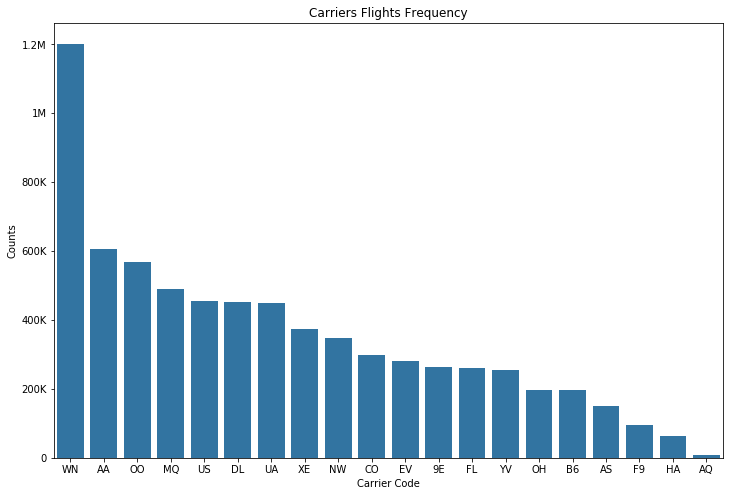

In [160]:
# Then, let's plot the carriers frequency

plt.figure(figsize = (12, 8))
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008, x = 'UniqueCarrier', color = color_palette, order = carrier_order );
plt.yticks([0, 2e5, 4e5, 6e5, 8e5, 10e5, 12e5], ['0' ,'200K' ,'400K' ,'600K' ,'800K' ,'1M', '1.2M']);
plt.title('Carriers Flights Frequency')
plt.xlabel('Carrier Code')
plt.ylabel('Counts')

> Here we can see that the x axis contain un-meaningful values.
<br></br>
> So, we need to merge **df_2008** dataset with **carrier** dataset to get carriers name.

In [18]:
# To get and show carriers name in plots, let's merge the tables

df_2008_clean = pd.merge(df_2008, carrier, left_on='UniqueCarrier', right_on='Code')

In [19]:
# Also, to get and show airports name in plots, let's merge the tables

df_2008_clean = pd.merge(df_2008_clean, airport, left_on='Origin', right_on='iata')

In [20]:
# Let's see the new columns

df_2008_clean.head(15)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,LateAircraftDelay,Code,Description,iata,airport,city,state,country,lat,long
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
2,2008,1,4,5,813.0,815,1035.0,1040,WN,2622,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
3,2008,1,4,5,1451.0,1450,1653.0,1710,WN,1491,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
4,2008,1,4,5,940.0,940,1140.0,1200,WN,3760,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
5,2008,1,4,5,1043.0,1045,1133.0,1145,WN,470,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
6,2008,1,4,5,630.0,630,714.0,725,WN,511,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
7,2008,1,4,5,2110.0,2100,2156.0,2200,WN,999,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
8,2008,1,4,5,1858.0,1720,1945.0,1820,WN,1394,...,76.0,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
9,2008,1,4,5,1505.0,1505,1550.0,1605,WN,1662,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581


In [21]:
# After the merges
# Let's rename the columns for origin, because we have to do another merge based on Dest column

df_2008_clean.rename(columns = {'Code':'carrier_code', 'Description':'carrier_desc', 'iata':'origin_iata', 
                                'airport':'origin_airport', 'city':'origin_city', 'state':'origin_state', 
                                'country':'origin_country', 'lat':'origin_lat', 'long':'origin_long'}, inplace = True)

In [22]:
# This merge like the prvious one but it is for Dest column to show the destination airports name

df_2008_clean = pd.merge(df_2008_clean, airport, left_on='Dest', right_on='iata')

In [23]:
# After the merge
# Let's rename the columns for Dest like what we did for Origin

df_2008_clean.rename(columns = {'iata':'dest_iata', 
                                'airport':'dest_airport', 'city':'dest_city', 'state':'dest_state', 
                                'country':'dest_country', 'lat':'dest_lat', 'long':'dest_long'}, inplace = True)

In [162]:
# Order the values for our plot

carrier_order = df_2008_clean.carrier_desc.value_counts().index

Text(0, 0.5, 'Counts')

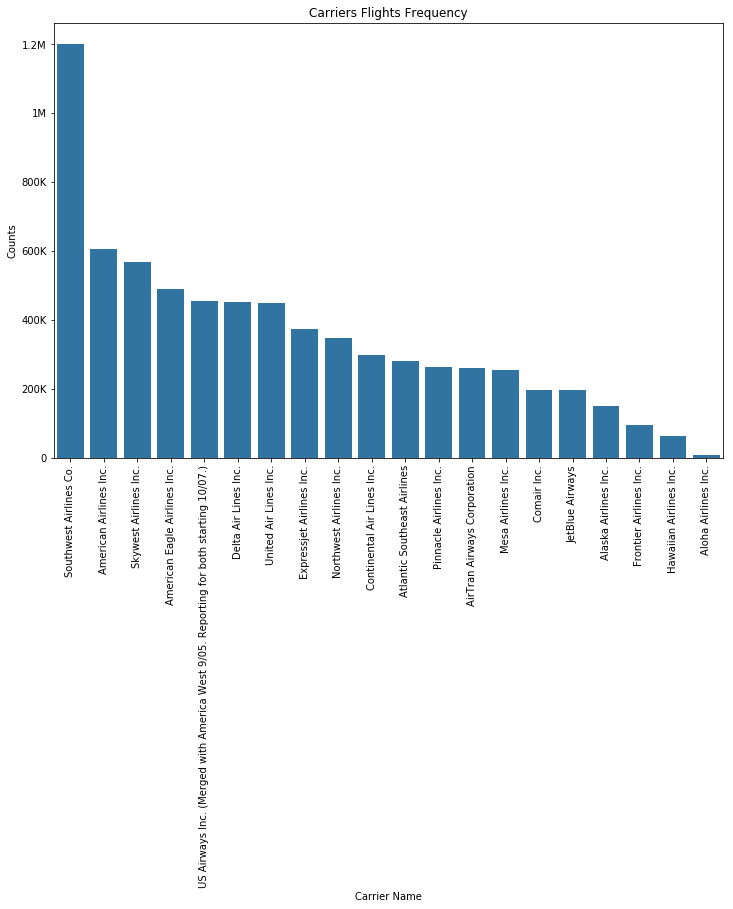

In [163]:
# So, Now we have all carrier names to show them in the plot

plt.figure(figsize = (12, 8))
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008_clean, x = 'carrier_desc', color = color_palette, order = carrier_order );
plt.yticks([0, 2e5, 4e5, 6e5, 8e5, 10e5, 12e5], ['0' ,'200K' ,'400K' ,'600K' ,'800K' ,'1M', '1.2M']);
plt.xticks(rotation = 90);
plt.title('Carriers Flights Frequency')
plt.xlabel('Carrier Name')
plt.ylabel('Counts')

The distribution is right skewed, also the most heighst bar has almost the double value of the second most one.
<br></br>
I am wondering what will be the distribution after adding a second variable "Month", we will see that in the **Bivariate Exploration**.

#### 2- How many flights does each airport has as (origin & destination)

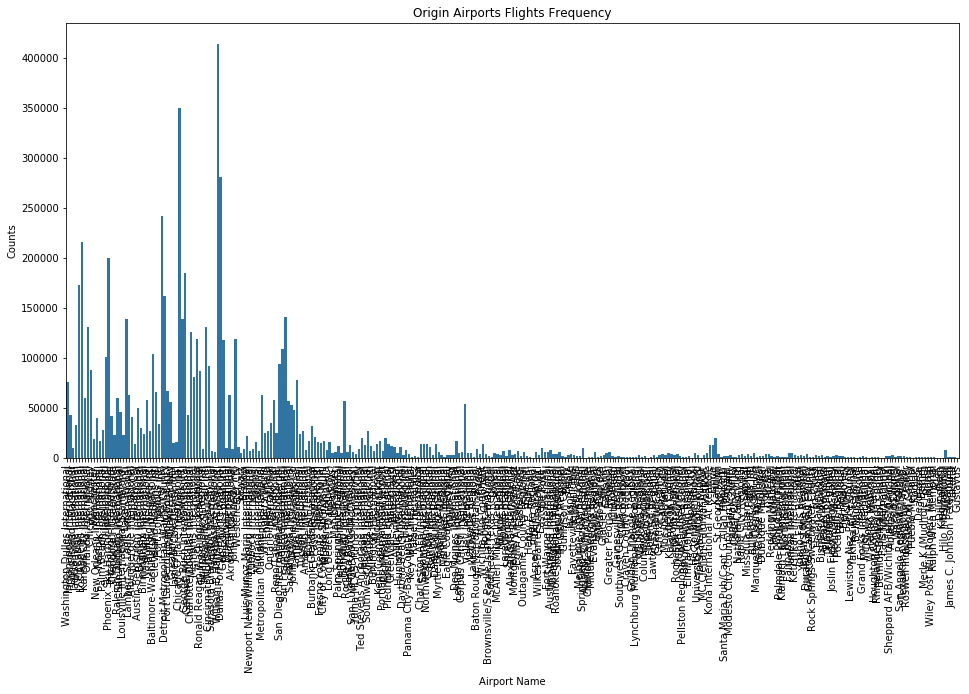

In [165]:
# Now, Let's plot the origin airports frequencies

plt.figure(figsize = (16, 8));
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008_clean, x = 'origin_airport', color = color_palette);
plt.xticks(rotation = 90);
plt.title('Origin Airports Flights Frequency');
plt.xlabel('Airport Name');
plt.ylabel('Counts');

Since there are many airports in the dataset :
> Let's show only the most 30 airport.
<br></br>
> Let's order the bars.
<br></br>
> Let's modify y ticks.

In [167]:
# Order the values for our plot

origin_order = df_2008_clean.origin_airport.value_counts().index

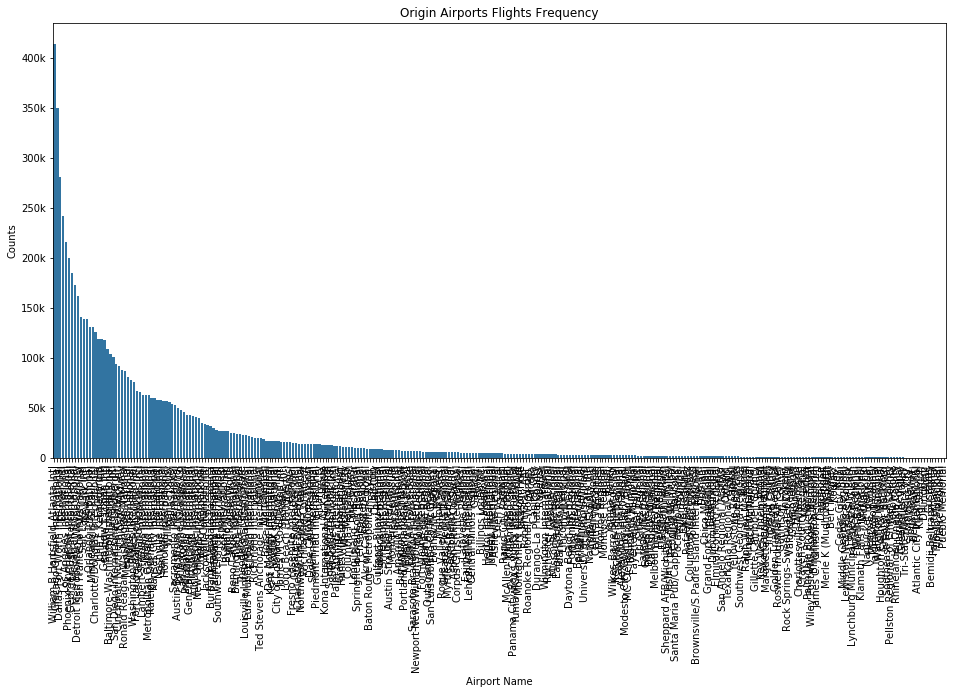

In [168]:
plt.figure(figsize = (16, 8))
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008_clean, x = 'origin_airport', color = color_palette, order = origin_order);
plt.yticks([0, 5e4, 10e4, 15e4, 20e4, 25e4, 30e4, 35e4, 40e4], ['0' ,'50k' ,'100k' ,'150k' ,'200k' ,'250k', '300k',
                                                                '350k', '400k']);
plt.xticks(rotation = 90);
plt.title('Origin Airports Flights Frequency');
plt.xlabel('Airport Name');
plt.ylabel('Counts');

In [169]:
# To plot only first 30 airports

origin_order2 = df_2008_clean.origin_airport.value_counts().iloc[:30].index

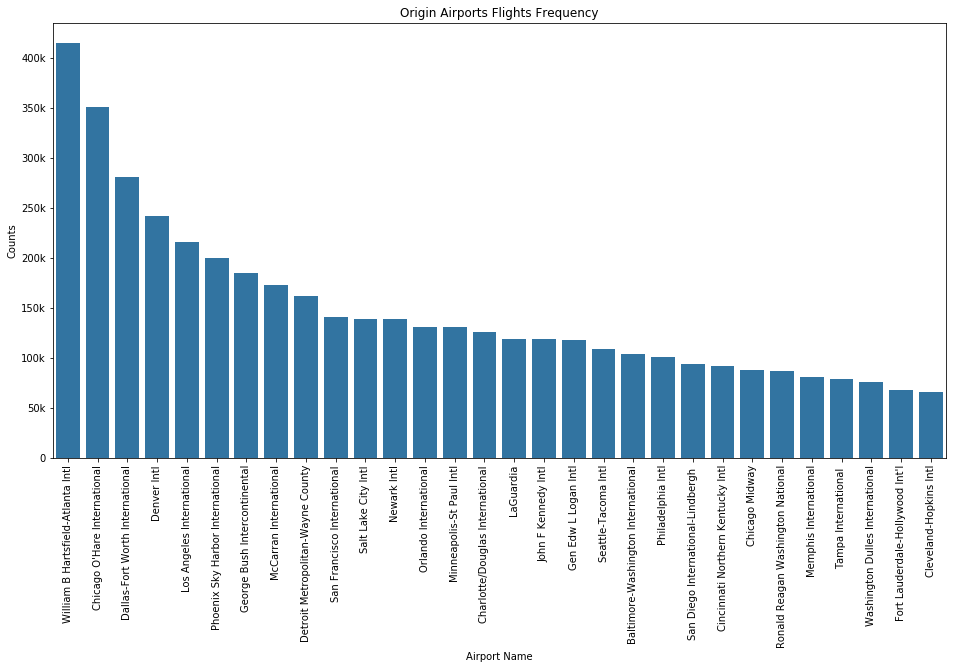

In [170]:
plt.figure(figsize = (16, 8))
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008_clean, x = 'origin_airport', color = color_palette, order = origin_order2);
plt.yticks([0, 5e4, 10e4, 15e4, 20e4, 25e4, 30e4, 35e4, 40e4], ['0' ,'50k' ,'100k' ,'150k' ,'200k' ,'250k', '300k',
                                                                '350k', '400k']);
plt.xticks(rotation = 90);
plt.title('Origin Airports Flights Frequency');
plt.xlabel('Airport Name');
plt.ylabel('Counts');

The above plot is for origin airports .. The distribution is right skewed, 
<br></br>
Let's do the same for destination airports.

In [171]:
# Order the values for our plot

dest_order = df_2008_clean.dest_airport.value_counts().index

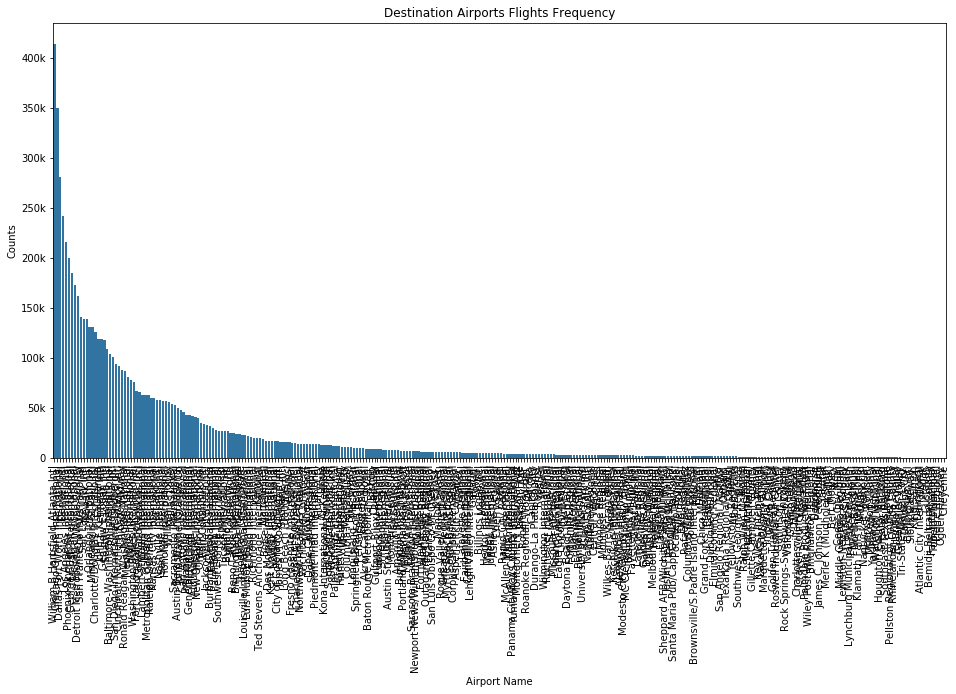

In [172]:
plt.figure(figsize = (16, 8))
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008_clean, x = 'dest_airport', color = color_palette, order = dest_order);
plt.yticks([0, 5e4, 10e4, 15e4, 20e4, 25e4, 30e4, 35e4, 40e4], ['0' ,'50k' ,'100k' ,'150k' ,'200k' ,'250k', '300k',
                                                                '350k', '400k']);
plt.xticks(rotation = 90);
plt.title('Destination Airports Flights Frequency');
plt.xlabel('Airport Name');
plt.ylabel('Counts');

In [173]:
# To plot only first 30 airports

dest_order2 = df_2008_clean.dest_airport.value_counts().iloc[:30].index

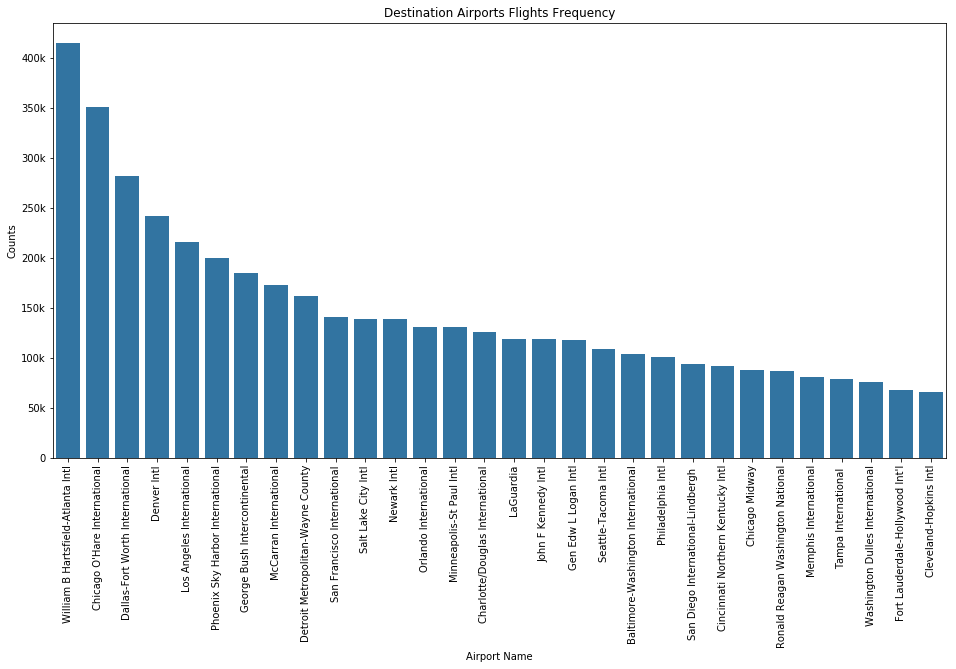

In [174]:
plt.figure(figsize = (16, 8))
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008_clean, x = 'dest_airport', color = color_palette, order = dest_order2);
plt.yticks([0, 5e4, 10e4, 15e4, 20e4, 25e4, 30e4, 35e4, 40e4], ['0' ,'50k' ,'100k' ,'150k' ,'200k' ,'250k', '300k',
                                                                '350k', '400k']);
plt.xticks(rotation = 90);
plt.title('Destination Airports Flights Frequency');
plt.xlabel('Airport Name');
plt.ylabel('Counts');

The above plot is for destination airports. The distribution is right skewed, the order is the same for origin at least for these 30 airports which make sence during to let's say the size of the airport.

#### 3- The Cause of the Cancelled Flights

In [35]:
# Let's see systematically how many values for each CancellationCode: 
# A = carrier, B = weather, C = National Air System 'NAS', D = security

df_2008_clean.groupby('CancellationCode').UniqueCarrier.count()

CancellationCode
A    54330
B    54904
C    28188
D       12
Name: UniqueCarrier, dtype: int64

In [36]:
# Let's systematically show the statistics of cancellation

df_2008_clean.groupby(['Cancelled', 'CancellationCode', 'carrier_desc']).Year.count()

Cancelled  CancellationCode  carrier_desc                                                                       
1          A                 AirTran Airways Corporation                                                             815
                             Alaska Airlines Inc.                                                                   1222
                             Aloha Airlines Inc.                                                                      42
                             American Airlines Inc.                                                                 9609
                             American Eagle Airlines Inc.                                                           3644
                             Atlantic Southeast Airlines                                                            1384
                             Comair Inc.                                                                            1328
                             Continental

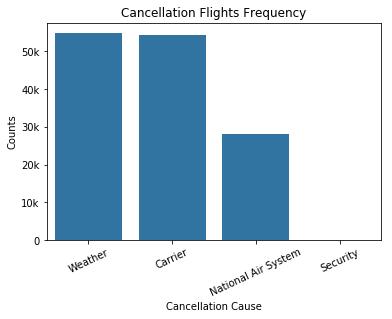

In [175]:
# Let's Plot the CancellationCode frequency

color_palette = sb.color_palette()[0]
labels = ['Weather', 'Carrier', 'National Air System', 'Security']
fig, ax1 = plt.subplots(1,1);
sb.countplot(data = df_2008_clean, x = 'CancellationCode', color = color_palette, ax=ax1, order=['B', 'A', 'C', 'D']);
ax1.set_xticklabels(labels, rotation=25);
plt.yticks([0, 1e4, 2e4, 3e4, 4e4, 5e4],['0', '10k', '20k', '30k', '40k', '50k']);
plt.title('Cancellation Flights Frequency');
plt.xlabel('Cancellation Cause');
plt.ylabel('Counts');

Weather and Carrier are almost the same, while NAS has a half of their value and Security almost has nothing.

#### 4- How Many Flights Does Each Hour Has
Because of the `DepTime` values stored as float, we should find a way to convert it to format like HH:MM
<br></br>
We will use xticks() to convert them

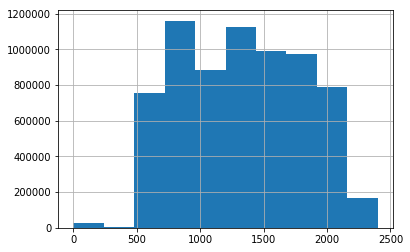

In [38]:
# Let's start with a simple histogram plot

df_2008_clean.DepTime.hist();

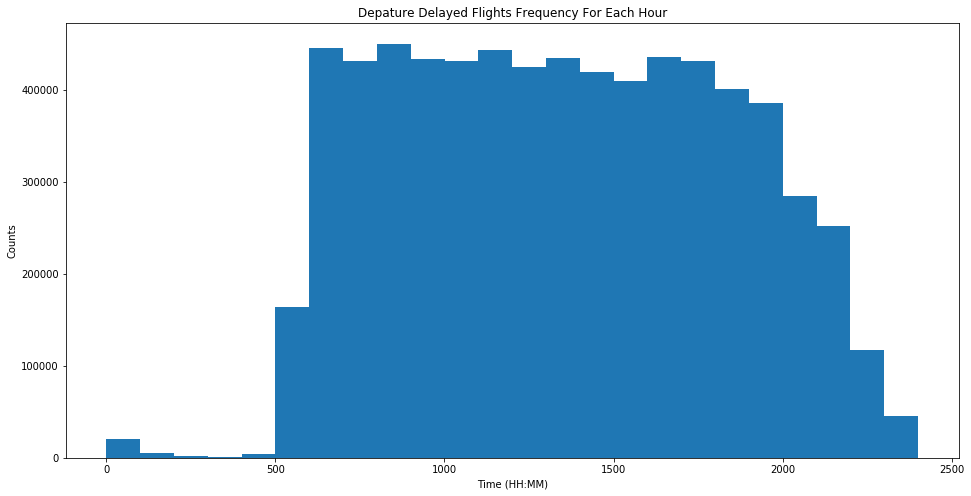

In [180]:
# Let's increase the number of bins, And let's show all the 24 hours

bins = 24
plt.figure(figsize=(16,8));
plt.hist(data = df_2008_clean, x = 'DepTime', bins = bins);
plt.title('Depature Delayed Flights Frequency For Each Hour');
plt.xlabel('Time (HH:MM)');
plt.ylabel('Counts');

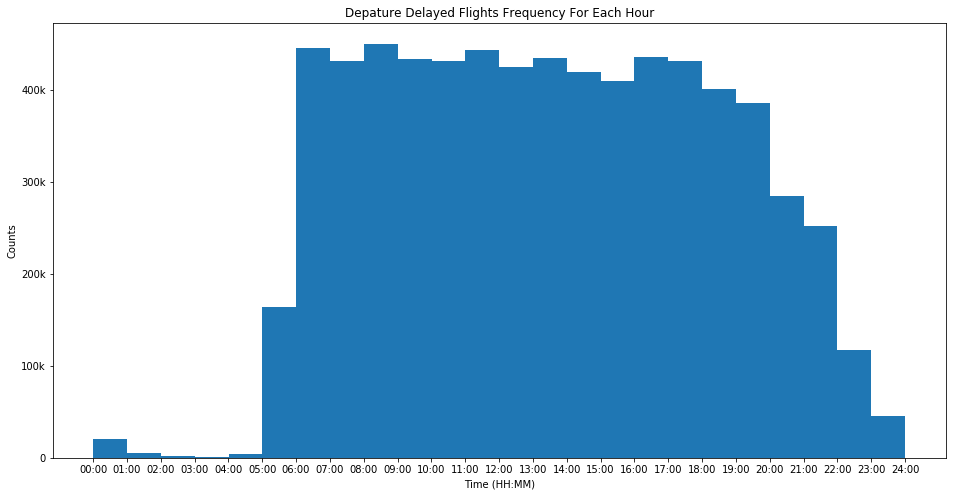

In [181]:
# Let's increase the number of bins, And let's show all the 24 hours

bins = 24
plt.figure(figsize=(16,8));
plt.hist(data = df_2008_clean, x = 'DepTime', bins = bins);
plt.xticks([0,0100.0,0200.0,0300.0,0400.0,0500.0,0600.0,0700.0,0800.0,0900.0,1000.0,1100.0,1200.0,1300.0,
            1400.0,1500.0,1600.0,1700.0,1800.0,1900.0,2000.0,2100.0,2200.0,2300.0,2400.0],
           ['00:00','01:00','02:00','03:00','04:00','05:00','06:00','07:00','08:00','09:00','10:00','11:00','12:00','13:00',
            '14:00','15:00','16:00','17:00','18:00','19:00','20:00','21:00','22:00','23:00','24:00']);
plt.yticks([0, 10e4, 20e4, 30e4, 40e4],['0', '100k', '200k', '300k', '400k']);
plt.title('Depature Delayed Flights Frequency For Each Hour');
plt.xlabel('Time (HH:MM)');
plt.ylabel('Counts');

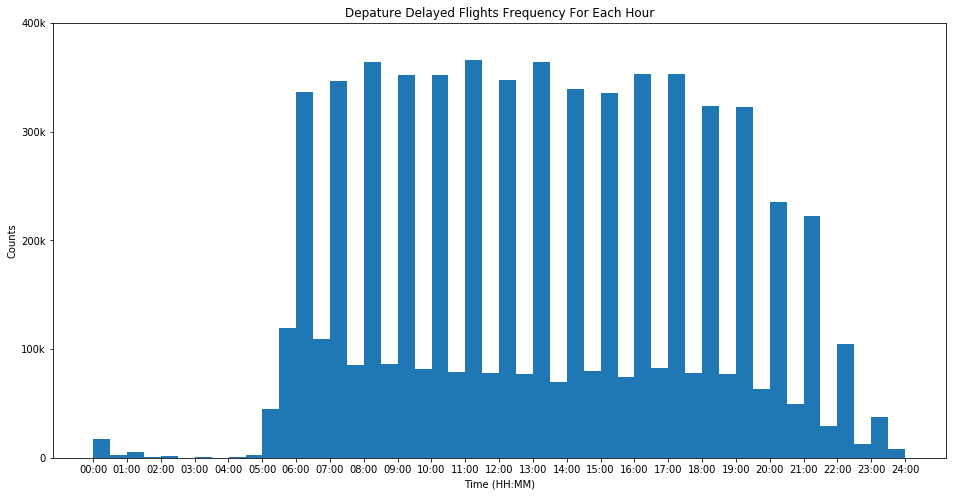

In [182]:
# Let's increase the number of bins

bins = 48
plt.figure(figsize=(16,8));
plt.hist(data = df_2008_clean, x = 'DepTime', bins = bins);
plt.xticks([0,0100.0,0200.0,0300.0,0400.0,0500.0,0600.0,0700.0,0800.0,0900.0,1000.0,1100.0,1200.0,1300.0,
            1400.0,1500.0,1600.0,1700.0,1800.0,1900.0,2000.0,2100.0,2200.0,2300.0,2400.0],
           ['00:00','01:00','02:00','03:00','04:00','05:00','06:00','07:00','08:00','09:00','10:00','11:00','12:00','13:00',
            '14:00','15:00','16:00','17:00','18:00','19:00','20:00','21:00','22:00','23:00','24:00']);
plt.yticks([0, 10e4, 20e4, 30e4, 40e4],['0', '100k', '200k', '300k', '400k']);
plt.title('Depature Delayed Flights Frequency For Each Hour');
plt.xlabel('Time (HH:MM)');
plt.ylabel('Counts');

The plot shows that the peak hours are from 6:00 to 19:00 as we can see, The plot also shows HH = 24, while there is no 24:00 and it seems that it is because of round 2359.5 in the original dataset

In [41]:
# Let's check for DepTime values > 2358.0 

df_2008_clean.query('DepTime > 2358')['DepTime']

6129       2359.0
6151       2400.0
6173       2400.0
6177       2400.0
6251       2400.0
6291       2359.0
6366       2359.0
6374       2359.0
6421       2359.0
40170      2359.0
60148      2359.0
64504      2400.0
68195      2400.0
71857      2400.0
83779      2400.0
99293      2400.0
134282     2359.0
177908     2359.0
211472     2400.0
214228     2400.0
223199     2400.0
238110     2400.0
245604     2359.0
260476     2359.0
260500     2400.0
260547     2400.0
260559     2359.0
260611     2359.0
260741     2359.0
260789     2359.0
            ...  
6707598    2359.0
6707834    2359.0
6708127    2359.0
6708406    2400.0
6708656    2400.0
6708968    2400.0
6718666    2359.0
6743088    2400.0
6747230    2359.0
6754698    2400.0
6767719    2359.0
6774046    2400.0
6780457    2400.0
6792128    2400.0
6799658    2359.0
6799768    2400.0
6800306    2400.0
6807481    2359.0
6823324    2400.0
6838868    2400.0
6840153    2400.0
6840163    2359.0
6841534    2359.0
6865483    2400.0
6869670   

#### 5- Delay Analysis:
We should notice that we have two main features for delay:
<br></br>
1- **ArrDelay:** arrival delay, in minutes
<br></br>
2- **DepDelay:** departure delay, in minutes
<br></br>
And the **`ArrDelay`** has 5 additional features : `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`
<br></br>
The **`ArrDelay`** is **not necessary** the sum of these features.

In [42]:
# Create a new dataframe called delay to store the dealy features

delay = df_2008_clean[["carrier_desc", "origin_airport","ArrDelay" , "DepDelay", "CarrierDelay", "WeatherDelay", 
                       "NASDelay", "SecurityDelay", "LateAircraftDelay"]]

In [43]:
# Store only non null values

delay = delay.query('ArrDelay >= 0 and DepDelay >= 0')

In [44]:
# Show the new dataframe
delay #.head(10)

,carrier_desc,origin_airport,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1,Southwest Airlines Co.,Washington Dulles International,2.0,19.0,NaN,NaN,NaN,NaN,NaN
9,Southwest Airlines Co.,Washington Dulles International,0.0,2.0,NaN,NaN,NaN,NaN,NaN
21,Southwest Airlines Co.,Washington Dulles International,45.0,58.0,0.0,0.0,0.0,0.0,45.0
28,Southwest Airlines Co.,Washington Dulles International,3.0,11.0,NaN,NaN,NaN,NaN,NaN
29,Southwest Airlines Co.,Washington Dulles International,83.0,64.0,0.0,0.0,19.0,0.0,64.0
30,Southwest Airlines Co.,Washington Dulles International,35.0,26.0,26.0,0.0,9.0,0.0,0.0
33,Southwest Airlines Co.,Washington Dulles International,20.0,12.0,0.0,0.0,20.0,0.0,0.0
51,Southwest Airlines Co.,Washington Dulles International,13.0,45.0,NaN,NaN,NaN,NaN,NaN
59,Southwest Airlines Co.,Washington Dulles International,50.0,69.0,2.0,0.0,0.0,0.0,48.0
62,Southwest Airlines Co.,Washington Dulles International,23.0,39.0,0.0,0.0,0.0,0.0,23.0


In [45]:
# Show systematically statistics

delay.describe()

,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,2.320755e+06,2.320755e+06,1.363926e+06,1.363926e+06,1.363926e+06,1.363926e+06,1.363926e+06
mean,3.796759e+01,3.545326e+01,1.761196e+01,3.395101e+00,1.599602e+01,8.380293e-02,2.316181e+01
std,5.266902e+01,5.133333e+01,4.199411e+01,2.058803e+01,3.294767e+01,1.943037e+00,4.082838e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,1.800000e+01,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,2.000000e+00
75%,4.700000e+01,4.500000e+01,1.900000e+01,0.000000e+00,1.800000e+01,0.000000e+00,3.000000e+01
max,2.461000e+03,2.467000e+03,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


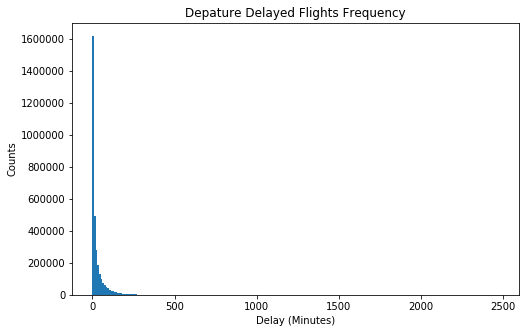

In [183]:
binsize = 10
bins = np.arange(0, df_2008_clean['DepDelay'].max()+binsize, binsize)

plt.figure(figsize=[8, 5]);
plt.hist(data = df_2008_clean, x = 'DepDelay', bins = bins);
plt.title('Depature Delayed Flights Frequency');
plt.ylabel('Counts');
plt.xlabel('Delay (Minutes)');
plt.show();

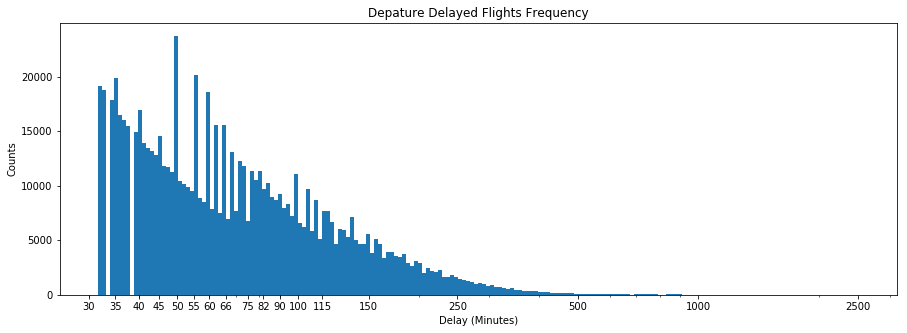

In [184]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.01
bins = 10 ** np.arange(1.5, np.log10(df_2008_clean['DepDelay'].max())+log_binsize, log_binsize)

plt.figure(figsize=[15, 5])
plt.hist(data = df_2008_clean, x = 'DepDelay', bins = bins)
plt.xscale('log')
plt.xticks([30, 35, 40, 45, 50, 55, 60, 66, 75, 82, 90, 100, 115, 150, 250, 500, 1000, 2500], 
           [30, 35, 40, 45, 50, 55, 60, 66, 75, 82, 90, 100, 115, 150, 250, 500, 1000, 2500])
plt.title('Depature Delayed Flights Frequency');
plt.ylabel('Counts');
plt.xlabel('Delay (Minutes)');
plt.show();
plt.show()

DepDelay has a long-tailed distribution, with a lot of DepDelay(s) on the low amount end, and few on the high amount end. When plotted on a log-scale, the DepDelay distribution looks right skewed with two or three heights, with one height between 30 and 35, and a second height between 47 and 60, and a third height between 98 and 110.

In [155]:
# How many flights have been delayed

delay.shape[0] / df_2008_clean.shape[0]

0.33107632707003753

So, 33% of the filghts in 2008 have been delayed.

In [46]:
# Total number of flights delayed pre carrier

delay.carrier_desc.value_counts()

Southwest Airlines Co.                                                                 445542
American Airlines Inc.                                                                 218895
Skywest Airlines Inc.                                                                  163844
American Eagle Airlines Inc.                                                           163371
United Air Lines Inc.                                                                  158197
Delta Air Lines Inc.                                                                   142698
Expressjet Airlines Inc.                                                               121373
US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)    115316
Continental Air Lines Inc.                                                             114653
Northwest Airlines Inc.                                                                 98701
Atlantic Southeast Airlines                                 

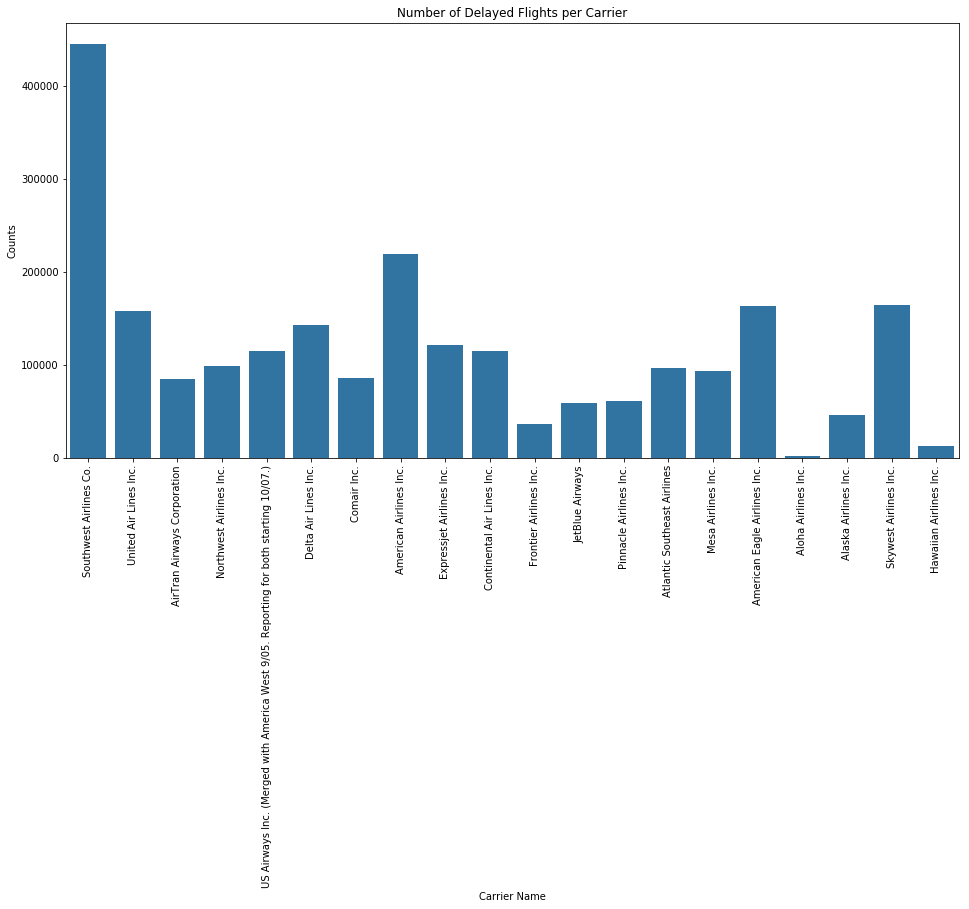

In [185]:
# Plot the Total number of flights delayed pre carrier

plt.figure(figsize = (16, 8));
sb.countplot(data = delay, x = 'carrier_desc', color = color_palette);
plt.xticks(rotation=90);
plt.title('Number of Delayed Flights per Carrier');
plt.ylabel('Counts');
plt.xlabel('Carrier Name');
plt.show();

In [186]:
# Order the value for the plot

order_c = delay['carrier_desc'].value_counts().index

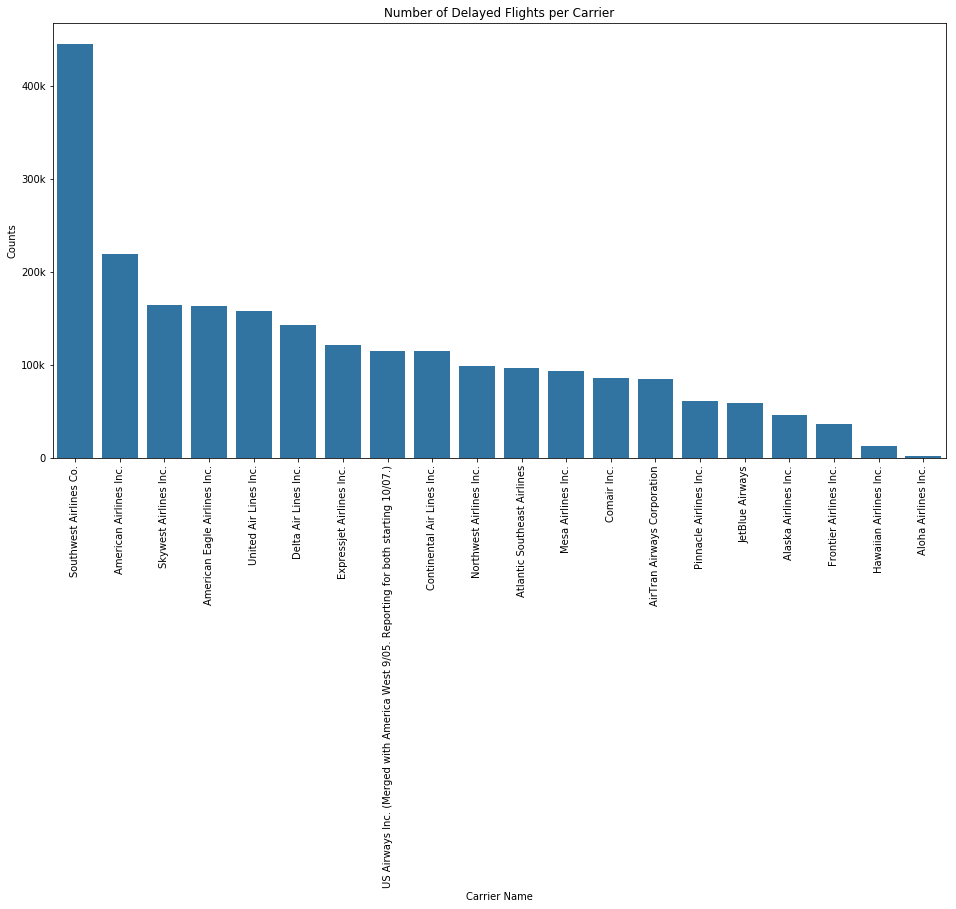

In [187]:
# Plot the Total number of flights delayed pre carrier with bars order

plt.figure(figsize = (16, 8));
sb.countplot(data = delay, x = 'carrier_desc', color = color_palette, order = order_c);
plt.xticks(rotation=90);
plt.yticks([0, 100e3, 200e3, 300e3, 400e3],['0', '100k', '200k', '300k', '400k']);
plt.title('Number of Delayed Flights per Carrier');
plt.ylabel('Counts');
plt.xlabel('Carrier Name');

This plot show the total number of flights delayed per carrier. But we need the plot to be as proportions to get an accurate conclusions.

In [50]:
# Let's count how many time each carrier flights have a (ArrDelay or DepDelay) delay

delay.groupby(['carrier_desc']).ArrDelay.count()

carrier_desc
AirTran Airways Corporation                                                             84420
Alaska Airlines Inc.                                                                    45955
Aloha Airlines Inc.                                                                      1418
American Airlines Inc.                                                                 218895
American Eagle Airlines Inc.                                                           163371
Atlantic Southeast Airlines                                                             96840
Comair Inc.                                                                             85960
Continental Air Lines Inc.                                                             114653
Delta Air Lines Inc.                                                                   142698
Expressjet Airlines Inc.                                                               121373
Frontier Airlines Inc.                         

In [51]:
# Show The proportion of number of times for Delay (ArrDelay or DepDelay) depending on the number of flights for 2008

delay.groupby(['carrier_desc']).ArrDelay.count() / df_2008_clean.carrier_desc.value_counts()

AirTran Airways Corporation                                                            0.322603
Alaska Airlines Inc.                                                                   0.304132
Aloha Airlines Inc.                                                                    0.181795
American Airlines Inc.                                                                 0.361879
American Eagle Airlines Inc.                                                           0.332939
Atlantic Southeast Airlines                                                            0.345148
Comair Inc.                                                                            0.435005
Continental Air Lines Inc.                                                             0.384155
Delta Air Lines Inc.                                                                   0.315752
Expressjet Airlines Inc.                                                               0.324085
Frontier Airlines Inc.                  

In [52]:
# The total number of DepDelay in Hours

delay.groupby(['carrier_desc']).DepDelay.sum()/60

carrier_desc
AirTran Airways Corporation                                                             50047.816667
Alaska Airlines Inc.                                                                    24340.116667
Aloha Airlines Inc.                                                                       329.100000
American Airlines Inc.                                                                 146088.183333
American Eagle Airlines Inc.                                                           102196.033333
Atlantic Southeast Airlines                                                             65411.783333
Comair Inc.                                                                             42422.216667
Continental Air Lines Inc.                                                              69939.416667
Delta Air Lines Inc.                                                                    73150.150000
Expressjet Airlines Inc.                                                      

In [53]:
# The total number of ArrDelay in Hours

delay.groupby(['carrier_desc']).ArrDelay.sum()/60

carrier_desc
AirTran Airways Corporation                                                             55183.266667
Alaska Airlines Inc.                                                                    25741.616667
Aloha Airlines Inc.                                                                       339.666667
American Airlines Inc.                                                                 158608.566667
American Eagle Airlines Inc.                                                           112556.633333
Atlantic Southeast Airlines                                                             68635.616667
Comair Inc.                                                                             52126.766667
Continental Air Lines Inc.                                                              74595.216667
Delta Air Lines Inc.                                                                    84555.583333
Expressjet Airlines Inc.                                                      

In [54]:
# Create a new dataframe called delay_prop to store the proportion of delay (ArrDelay or DepDelay) per carrier

d = {'prop': delay.groupby(['carrier_desc']).DepDelay.count() / df_2008_clean.carrier_desc.value_counts()}
delay_prop = pd.DataFrame(data=d)
delay_prop.reset_index(level=0, inplace=True)
delay_prop.rename(columns = {'index': 'carrier_desc'}, inplace=True)
delay_prop

,carrier_desc,prop
0,AirTran Airways Corporation,0.322603
1,Alaska Airlines Inc.,0.304132
2,Aloha Airlines Inc.,0.181795
3,American Airlines Inc.,0.361879
4,American Eagle Airlines Inc.,0.332939
5,Atlantic Southeast Airlines,0.345148
6,Comair Inc.,0.435005
7,Continental Air Lines Inc.,0.384155
8,Delta Air Lines Inc.,0.315752
9,Expressjet Airlines Inc.,0.324085


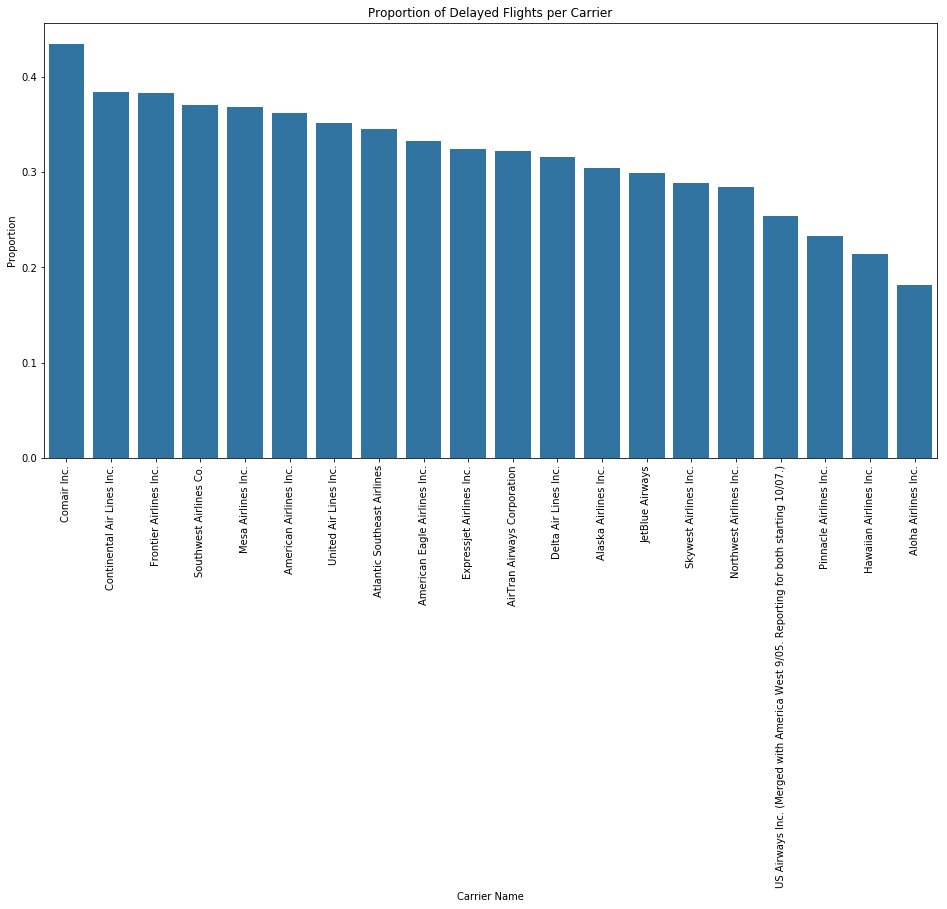

In [188]:
# plot the delay_prop (ArrDelay or DepDelay)
plt.figure(figsize=(16,8))
sb.barplot(data = delay_prop, x = 'carrier_desc', y = 'prop', color = color_palette);
plt.xticks(rotation=90);
plt.title('Proportion of Delayed Flights per Carrier');
plt.ylabel('Proportion');
plt.xlabel('Carrier Name');

In [56]:
# Order the values for the plot

delay_prop = pd.DataFrame(data = delay_prop[['carrier_desc','prop']].sort_values(by='prop',ascending=False))
delay_prop.reset_index(drop=True, inplace=True)
delay_prop

,carrier_desc,prop
0,Comair Inc.,0.435005
1,Continental Air Lines Inc.,0.384155
2,Frontier Airlines Inc.,0.382835
3,Southwest Airlines Co.,0.370743
4,Mesa Airlines Inc.,0.368140
5,American Airlines Inc.,0.361879
6,United Air Lines Inc.,0.351928
7,Atlantic Southeast Airlines,0.345148
8,American Eagle Airlines Inc.,0.332939
9,Expressjet Airlines Inc.,0.324085


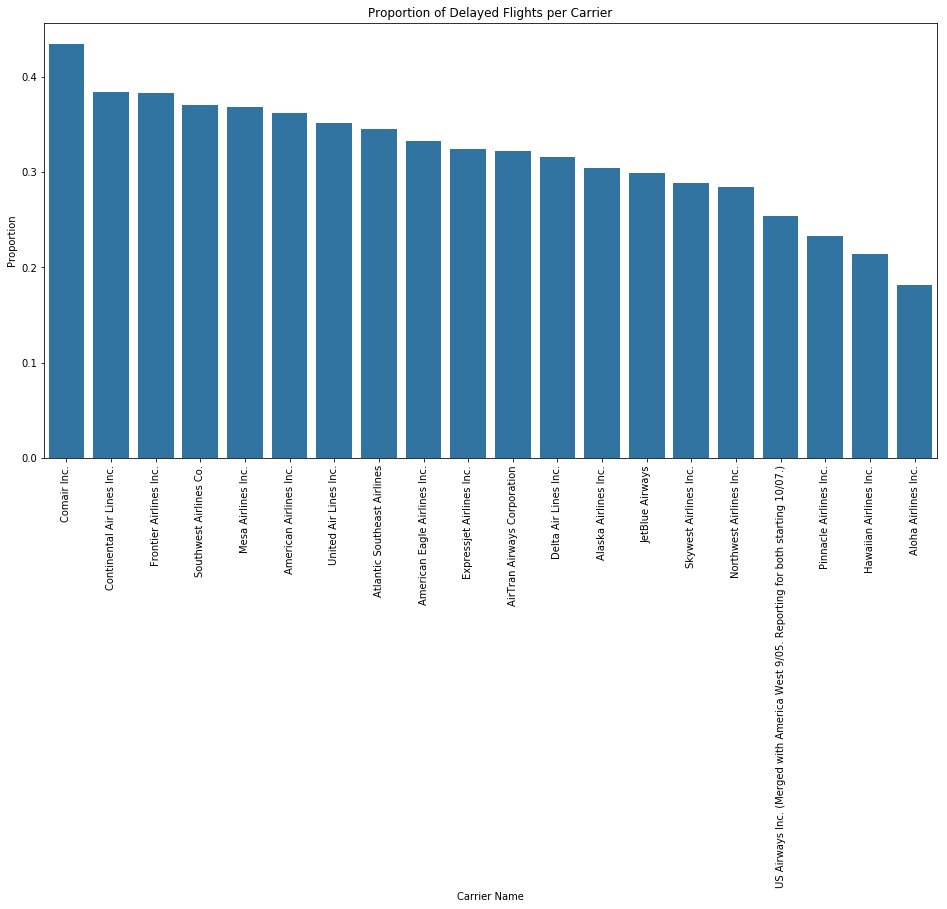

In [189]:
# Plot the ordered delay_prop

plt.figure(figsize=(16,8))
sb.barplot(data = delay_prop, x = 'carrier_desc', y = 'prop', color = color_palette);
plt.xticks(rotation=90);
plt.title('Proportion of Delayed Flights per Carrier');
plt.ylabel('Proportion');
plt.xlabel('Carrier Name');

The plot shows that Comair Inc. Carrier has more than 40% delay of their flights and we can say that it is the worst Carrier.

## Bivariate Exploration

To start off with, Let's add another variable "Month" for both plots carrier freq. & origin_airport freq.
<br></br>
Previously, we saw how many Flights per Carrier, let's modify the plot :

In [143]:
# Order the values for our plot

carrier_order = df_2008_clean.carrier_desc.value_counts().index

Text(0, 0.5, 'Counts')

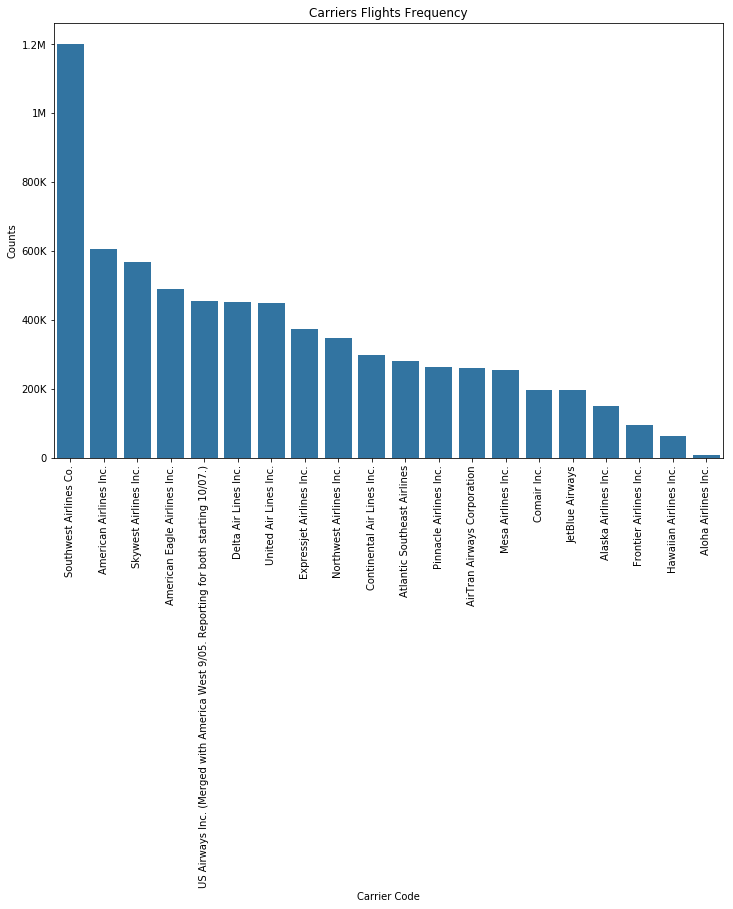

In [190]:
# So, Now we have all carrier names to show them in the plot

plt.figure(figsize = (12, 8))
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008_clean, x = 'carrier_desc', color = color_palette, order = carrier_order );
plt.yticks([0, 2e5, 4e5, 6e5, 8e5, 10e5, 12e5], ['0' ,'200K' ,'400K' ,'600K' ,'800K' ,'1M', '1.2M']);
plt.xticks(rotation = 90);
plt.title('Carriers Flights Frequency');
plt.xlabel('Carrier Name');
plt.ylabel('Counts');

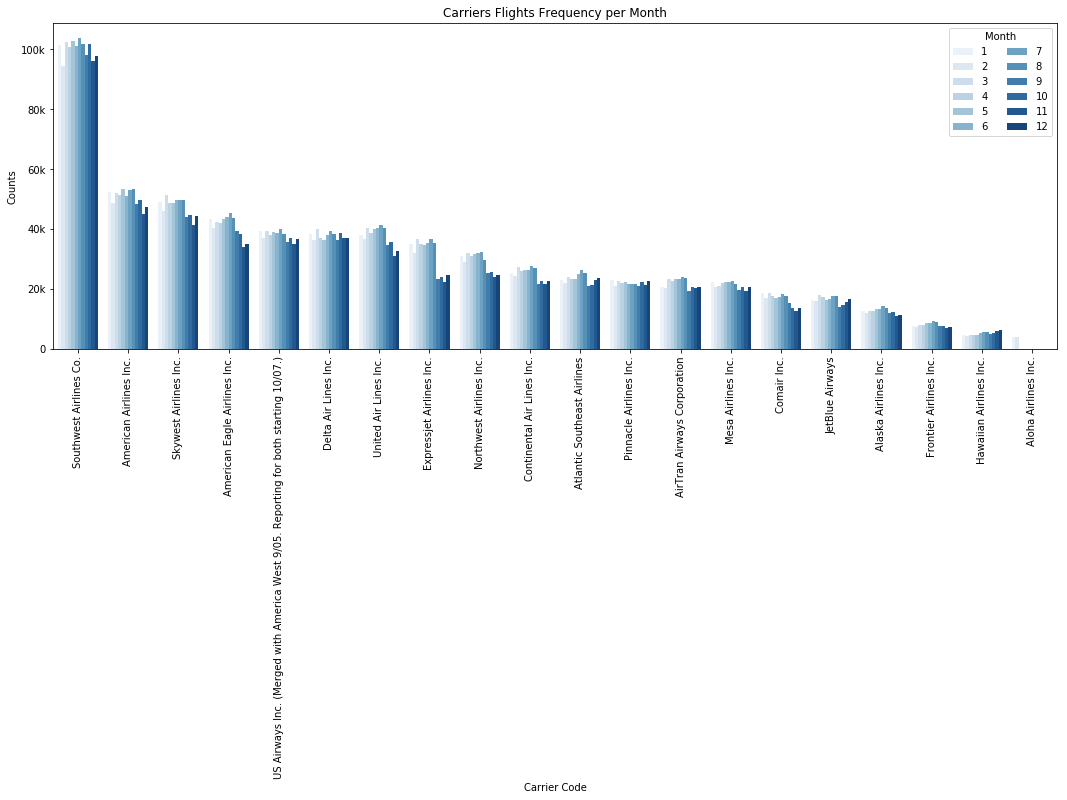

In [193]:
# We started the Univariate Exploration with the number of filghts per Carrier
# Let's have a look for the same plot but with another variable "Month"
# With the same order

plt.figure(figsize = [18, 6]);
sb.countplot(data = df_2008_clean, x = 'carrier_desc', hue = 'Month', palette = 'Blues', order = carrier_order);
plt.yticks([0, 20e3, 40e3, 60e3, 80e3, 100e3], ['0' ,'20k' ,'40k' ,'60k' ,'80k' ,'100k']);
plt.xticks(rotation=90);
plt.legend(title = 'Month', loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.title('Carriers Flights Frequency per Month');
plt.xlabel('Carrier Name');
plt.ylabel('Counts');
plt.show();

We can see that most of Carriers have a fewer numbers of flights on **Nov(11)** than the rest of months. And also Carriers have more numbers of filghts on **Jun(6)** than the rest of months.
<br></br>
<br></br>
Let's do the same thing for origin airports:

In [150]:
# To plot only first 30 airports

origin_order2 = df_2008_clean.origin_airport.value_counts().iloc[:30].index

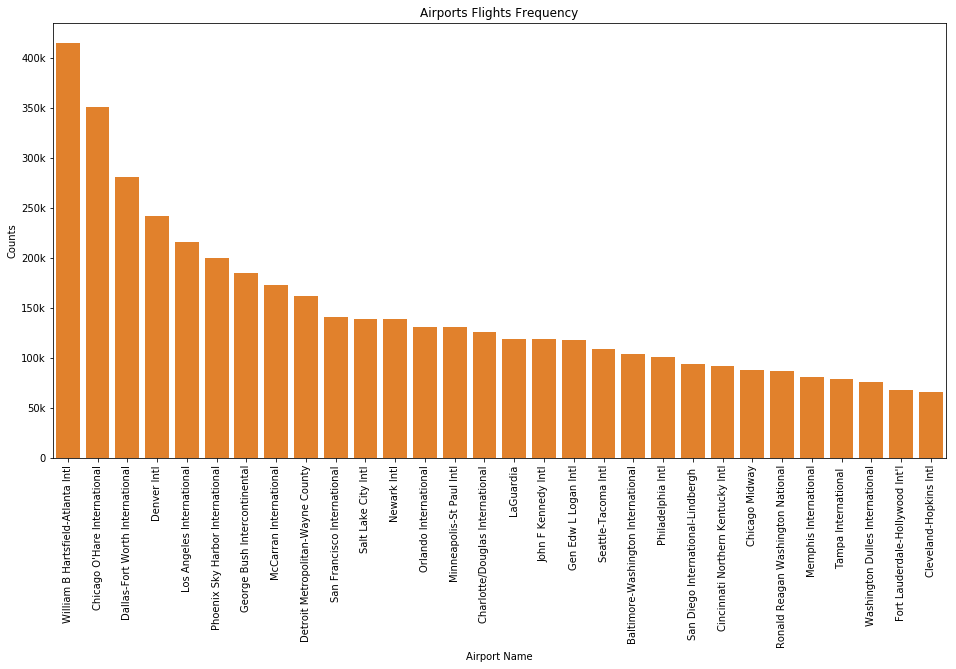

In [194]:
plt.figure(figsize = (16, 8))
color_palette2 = sb.color_palette()[1]
sb.countplot(data = df_2008_clean, x = 'origin_airport', color = color_palette2, order = origin_order2);
plt.yticks([0, 5e4, 10e4, 15e4, 20e4, 25e4, 30e4, 35e4, 40e4], ['0' ,'50k' ,'100k' ,'150k' ,'200k' ,'250k', '300k',
                                                                '350k', '400k']);
plt.xticks(rotation = 90);
plt.title('Airports Flights Frequency');
plt.xlabel('Airport Name');
plt.ylabel('Counts');

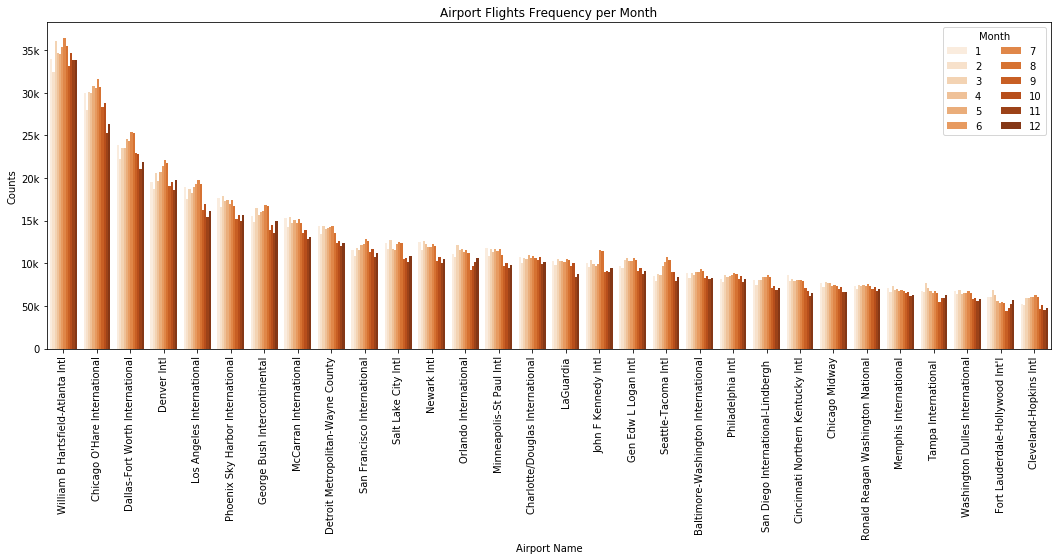

In [196]:
plt.figure(figsize = [18, 6])
sb.countplot(data = df_2008_clean, x = 'origin_airport', hue = 'Month', palette = 'Oranges', order = origin_order2);
plt.yticks([0, 5e3, 10e3, 15e3, 20e3, 25e3, 30e3, 35e3], ['0' ,'50k' ,'10k' ,'15k' ,'20k' ,'25k', '30k', '35k']);
plt.xticks(rotation=90)
plt.legend(title = 'Month', loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.title('Airport Flights Frequency per Month');
plt.xlabel('Airport Name');
plt.ylabel('Counts');
plt.show();

We can say the same thing here for the most 30 Airports, they have a fewer numbers of flights on **Nov(11)** than the rest of months. And also they have more numbers of filghts on **Jun(6)** than the rest of months.

I want to look at the pairwise correlations present between Delay features in the data.

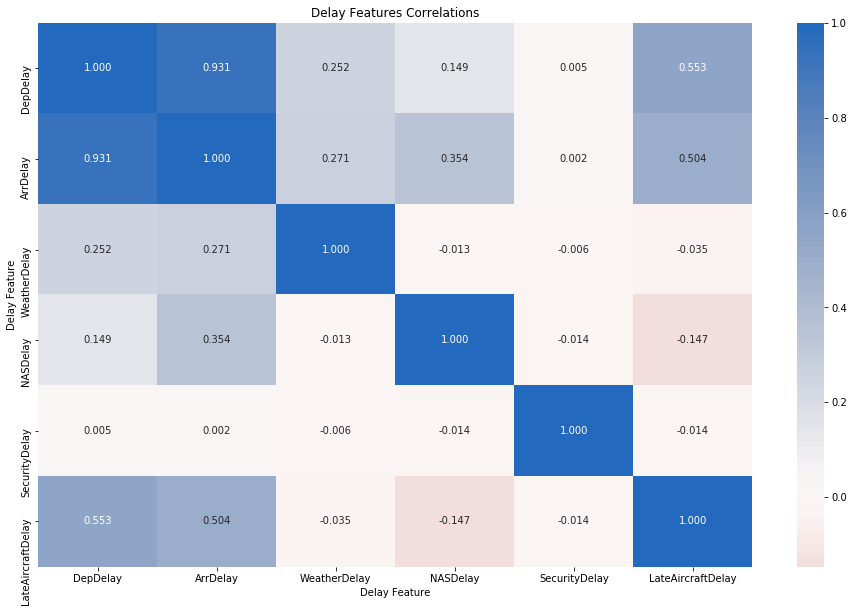

In [197]:
# correlation plot

numeric_vars = ['DepDelay', 'ArrDelay' , 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
plt.figure(figsize = [16, 10])
sb.heatmap(df_2008_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Delay Features Correlations');
plt.xlabel('Delay Feature');
plt.ylabel('Delay Feature');
plt.show()

As we can see `DepDelay` has positive strong correlation with `ArrDelay` and it is natural to be positive strong since any depature delay will cause a delay in the arrival time.
<br></br>
Also there is a mid positive correlation between 'LateAircraftDelay' and the delay in both `DepDelay` & `ArrDelay` 

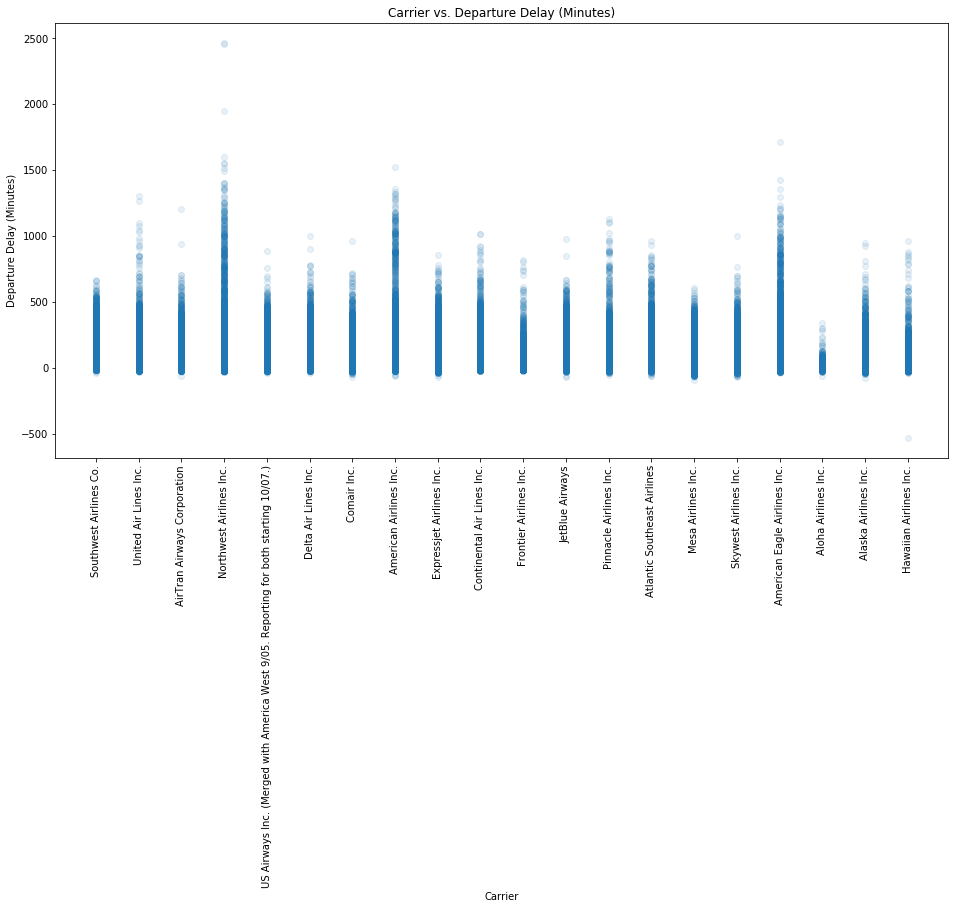

In [71]:
# scatter plot of carrier_desc vs. DepDelay

plt.figure(figsize = [16, 8]);
plt.scatter(data = df_2008_clean, x = 'carrier_desc', y = 'DepDelay', alpha = 1/10);
plt.xticks(rotation=90);
plt.xlabel('Carrier');
plt.ylabel('Departure Delay (Minutes)');
plt.title('Carrier vs. Departure Delay (Minutes)');
plt.show();

As we can see from the plot, most of the carriers have a lot of flights delay reaches to 500 Minutes ~ 8 Hours & 20 Minutes.
<br></br>
The **worst** carriers in terms of `DepDelay` are :
<br></br>
> 1- Northwest Airlines Inc.
<br></br>
> 2- American Eagle Airlines Inc.
<br></br>
> 3- American Airlines Inc.

While the **best** one is :
<br></br>
> 1- Aloha Airlines Inc.
<br></br>
> 2- Mesa Airlines Inc.
<br></br>
> 3- Southwest Airlines Co.

But scatter plot is not the best choice, let's try violin plot :

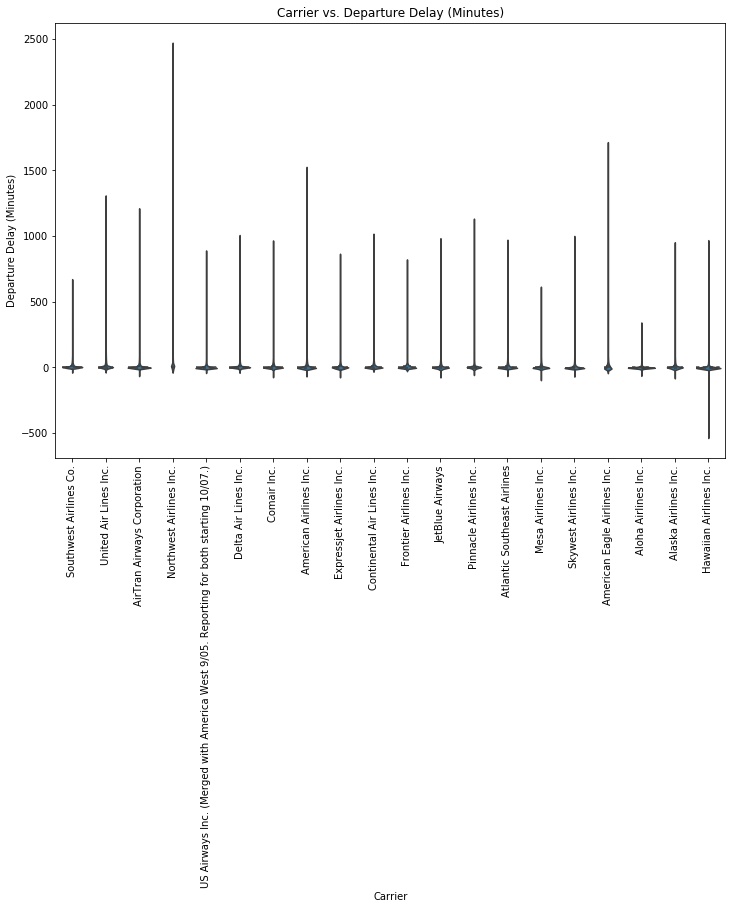

In [198]:
# Let's use the Violin Polt for these two features:

plt.figure(figsize = (12, 8))
base_color = sb.color_palette()[0]
sb.violinplot(data = df_2008_clean, x = 'carrier_desc', y = 'DepDelay',
              color = base_color, inner = 'quartile');
plt.xticks(rotation = 90);
plt.xlabel('Carrier');
plt.ylabel('Departure Delay (Minutes)');
plt.title('Carrier vs. Departure Delay (Minutes)');

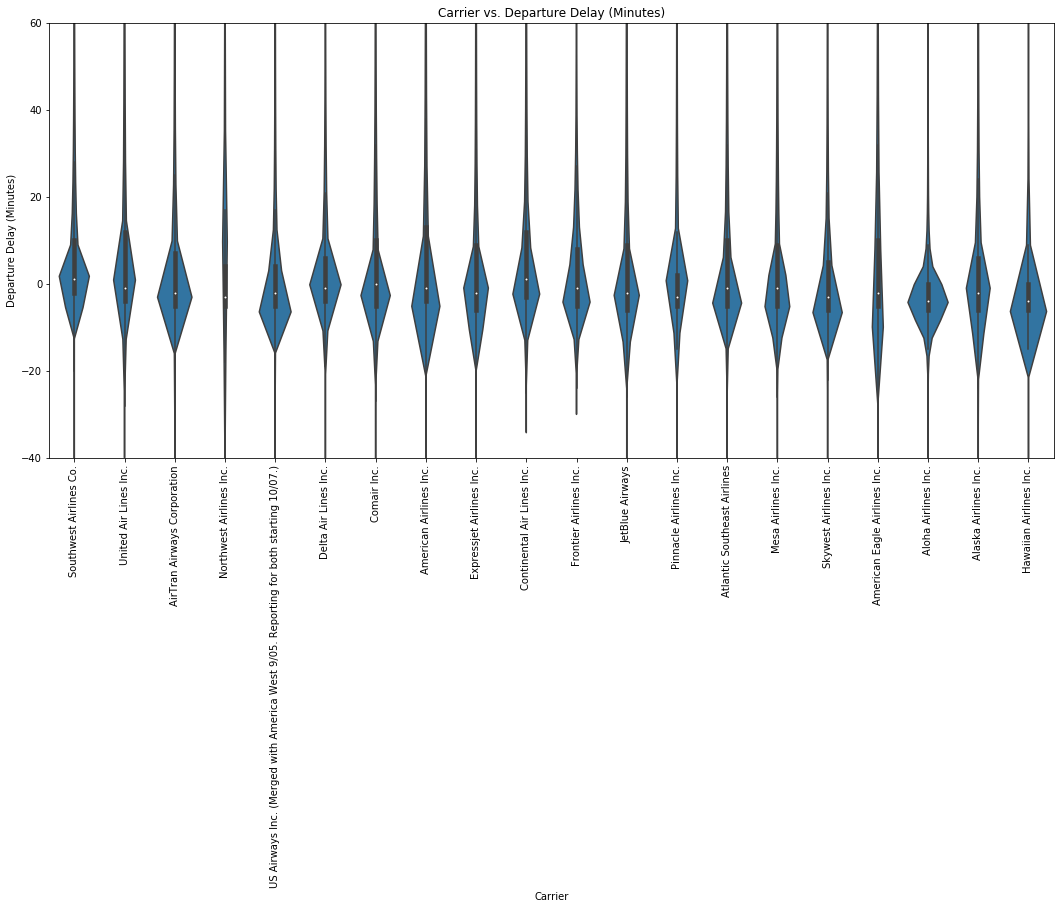

In [199]:
# Let's look closely to the Violin Polt for these two features with limit on y axis :

plt.figure(figsize = (18, 8))
base_color = sb.color_palette()[0]
sb.violinplot(data = df_2008_clean, x = 'carrier_desc', y = 'DepDelay',
              color = base_color);
plt.ylim([-40, 60])
plt.xticks(rotation = 90);
plt.xlabel('Carrier');
plt.ylabel('Departure Delay (Minutes)');
plt.title('Carrier vs. Departure Delay (Minutes)');

Now the judgment differ, here with violin plot we can see that :
<br></br>
Northwest Airlines Inc. has a slim shape with median less than zero.
<br></br>
Also American Eagle Airlines Inc. has the second most slim shape with also median less than zero

## Multivariate Exploration

The most important multivatiate plot will be `carrier` vs. `origin_airport` vs. `DepDelay`

In [82]:
# Let's take only 5 most carrier from delay dataset, and 5 most origin_airport from delay dataset

origin_order = delay.origin_airport.value_counts().iloc[:5].index
order_c = delay['carrier_desc'].value_counts().iloc[:5].index

C:\Users\raied\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


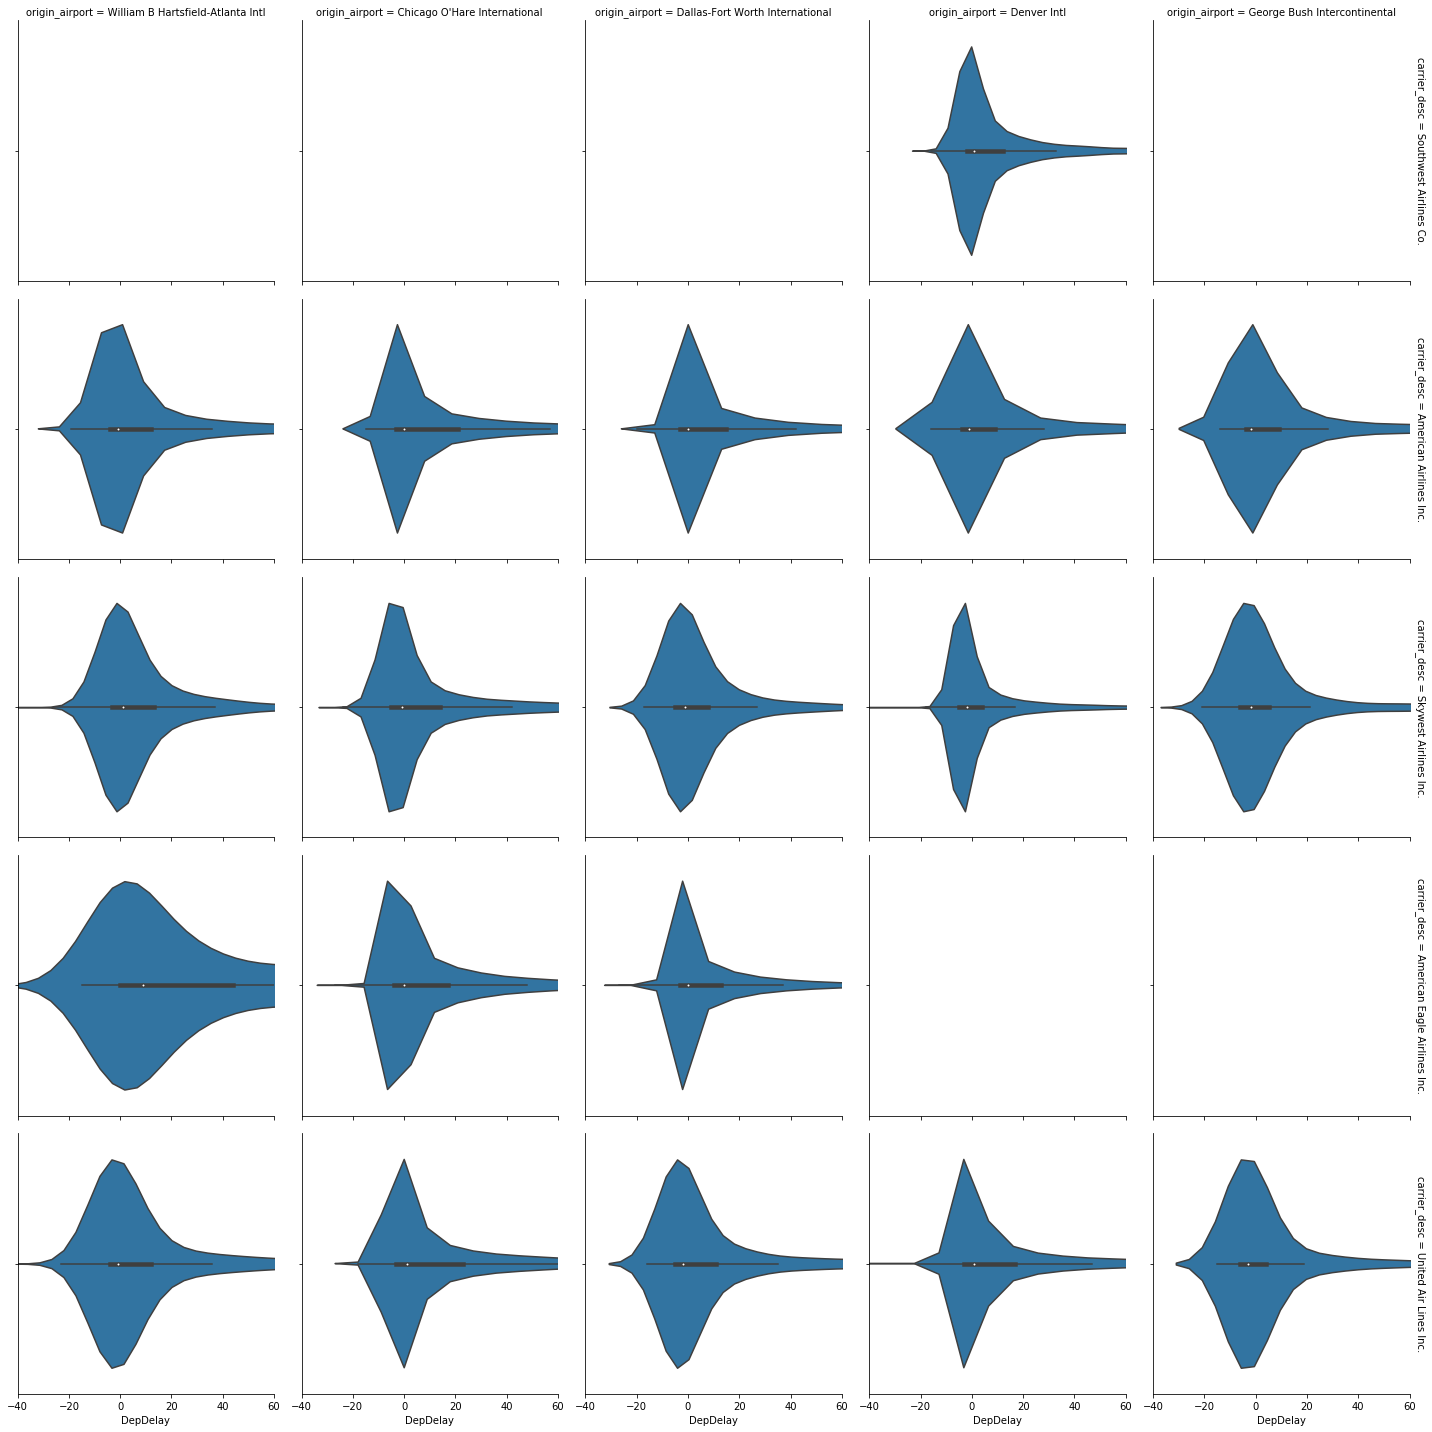

In [83]:
# We will use origin_airport as columns
# We will use carrier_desc as rows
# And in x axis will be the DepDelay with Violinplot

g = sb.FacetGrid(data = df_2008_clean, col = 'origin_airport', row = 'carrier_desc', height=4,
                 margin_titles = True, row_order=order_c, col_order=origin_order, xlim = [-40, 60]);
g.map(sb.violinplot,'DepDelay');
#g.map(plt.scatter,'DepDelay', 'ArrDelay', alpha = 1/10);

C:\Users\raied\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


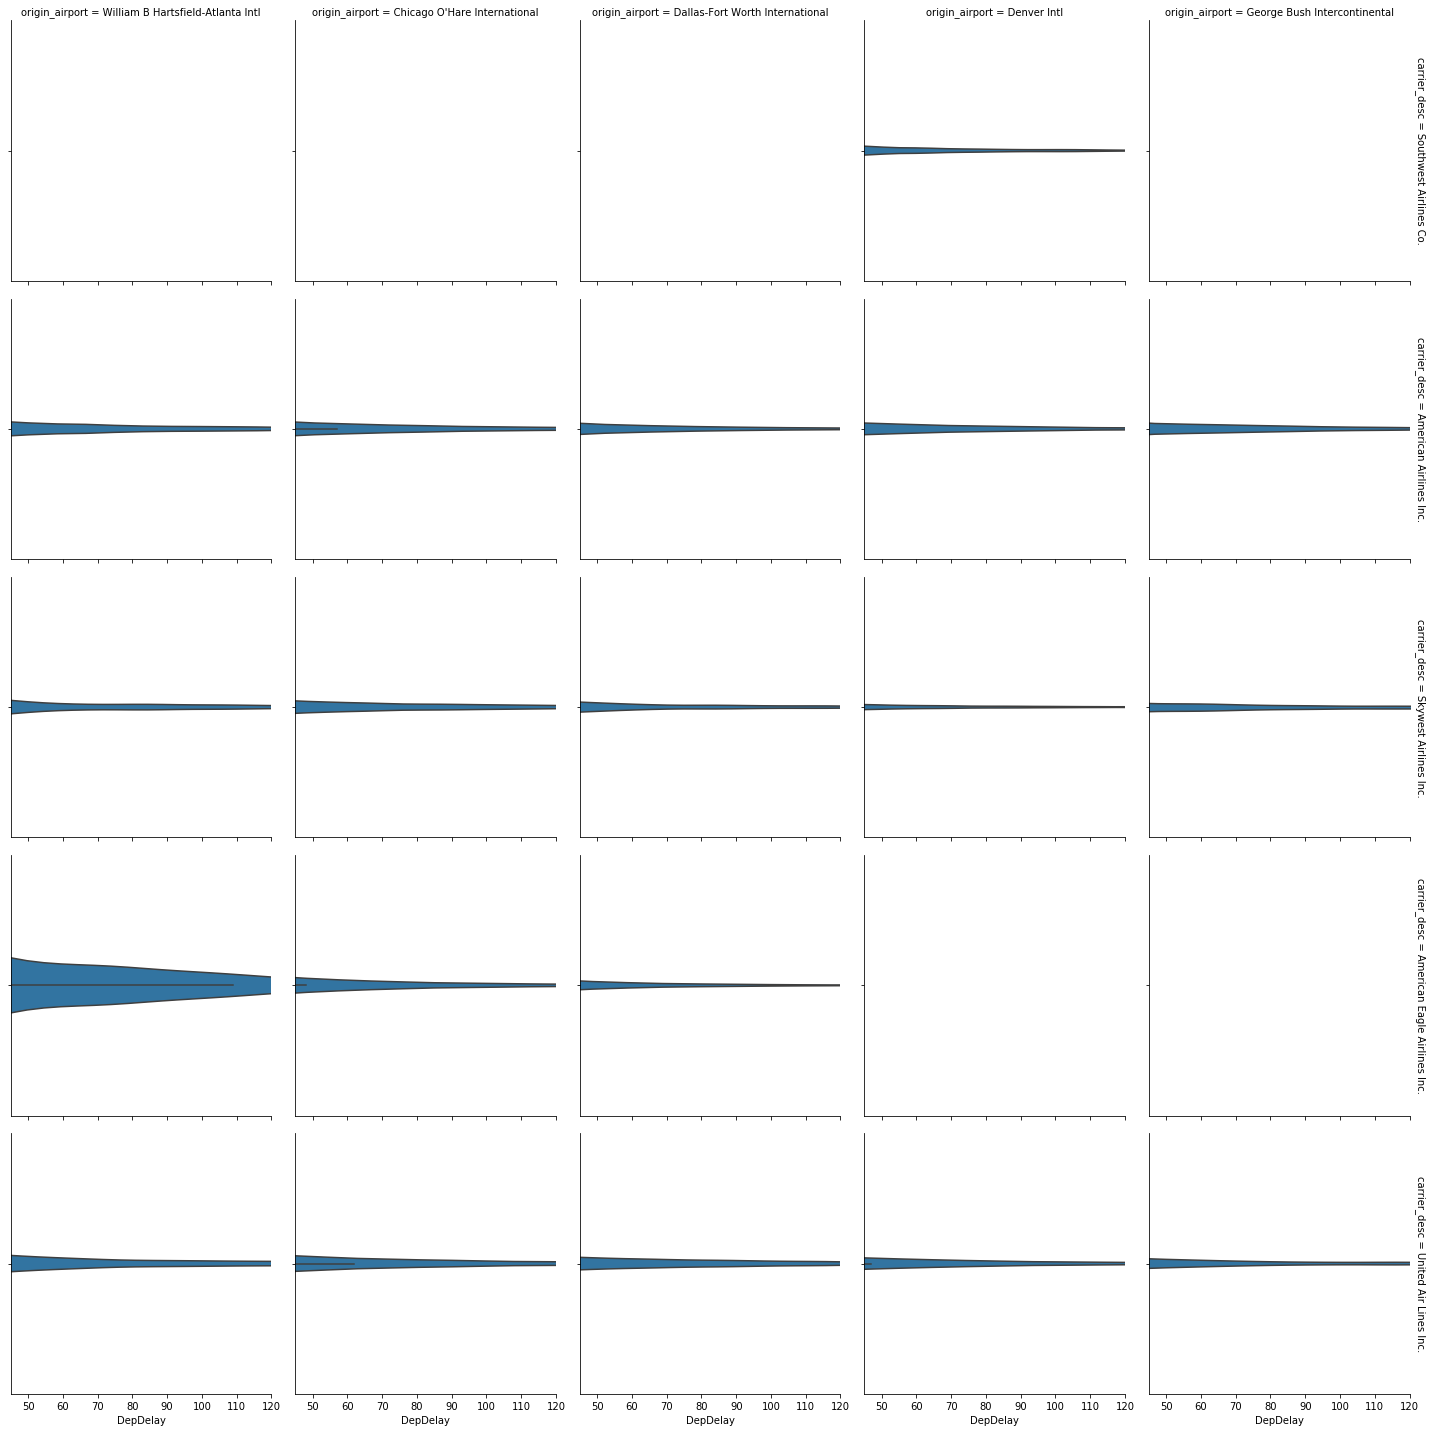

In [84]:
# Let's increase the xlim to be 45 min. to 120 min. to make a closer look

g = sb.FacetGrid(data = df_2008_clean, col = 'origin_airport', row = 'carrier_desc', height=4,
                 margin_titles = True, row_order=order_c, col_order=origin_order, xlim = [45, 120]);
g.map(sb.violinplot,'DepDelay');
#g.map(plt.scatter,'DepDelay', 'ArrDelay', alpha = 1/10);

Here we can see a sample of 5x5 relationships between `carrier`, `origin_airport`, and their `DepDelay`
<br></br>
We can see that **carrier: American Eagle Airlines Inc.** has more delay with **origin_airport: William B Hartsfield-Atlanta Intl** than others

In [85]:
# Just to be sure, because of the warning message above

test = df_2008_clean.query('carrier_desc == "American Eagle Airlines Inc." and origin_airport == "William B Hartsfield-Atlanta Intl"')
test

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,origin_country,origin_lat,origin_long,dest_iata,dest_airport,dest_city,dest_state,dest_country,dest_lat,dest_long
3337133,2008,1,1,2,NaN,1315,NaN,1420,MQ,4443,...,USA,33.640444,-84.426944,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464
3337134,2008,1,2,3,1348.0,1315,1457.0,1420,MQ,4443,...,USA,33.640444,-84.426944,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464
3337135,2008,1,3,4,1313.0,1315,1407.0,1420,MQ,4443,...,USA,33.640444,-84.426944,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464
3337136,2008,1,4,5,1348.0,1315,1438.0,1420,MQ,4443,...,USA,33.640444,-84.426944,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464
3337137,2008,1,5,6,1328.0,1315,1419.0,1420,MQ,4443,...,USA,33.640444,-84.426944,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464
3337138,2008,1,6,7,1457.0,1315,1622.0,1420,MQ,4443,...,USA,33.640444,-84.426944,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464
3337139,2008,1,7,1,1358.0,1315,1456.0,1420,MQ,4443,...,USA,33.640444,-84.426944,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464
3337140,2008,1,8,2,1359.0,1315,1504.0,1420,MQ,4443,...,USA,33.640444,-84.426944,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464
3337141,2008,1,9,3,1320.0,1315,1409.0,1420,MQ,4443,...,USA,33.640444,-84.426944,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464
3337142,2008,1,10,4,1320.0,1315,1405.0,1420,MQ,4443,...,USA,33.640444,-84.426944,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464


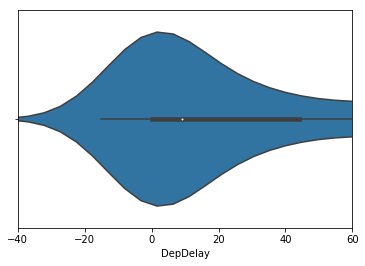

In [86]:
# Just to be sure, because of the warning message above

sb.violinplot(data = test, x = 'DepDelay');
plt.xlim([-40, 60]);

In [87]:
# We can move to the next 5 carriers and the next 5 origin_airport by increasing the iloc inputs

origin_order = delay.origin_airport.value_counts().iloc[5:10].index
order_c = delay['carrier_desc'].value_counts().iloc[5:10].index